In [82]:
import pandas as pd
import numpy as np
import matplotlib as mpl
from AQI_FUNCTIONS import *
import matplotlib.pyplot as plt
import seaborn as sns
#import joypy
from scipy.stats import spearmanr
from windrose import WindroseAxes
import matplotlib.cm as cm
mpl.rcParams["figure.dpi"] = 300





In [3]:

#=====use this when running from the drive =========
in_data_path = '../DATA/'
out_data_path = '../DATA/Cleaned_Data/'
image_path = '../IMAGES/'

In [4]:
aq_data = pd.read_csv(out_data_path+'cleaned_met_aq_data.csv',
                          na_values=[-99.9, -9.99, -9999, 'M',' ',-999],
                          parse_dates=['date_time'], index_col='date_time')

In [5]:
#drop the uncorrected pm columns so one doesnt get confused on the column to use
aq_data.drop(columns=['uncorrected_pm25'],inplace=True)
aq_data

,year,season,month_of_year,day_of_week,day_of_month,hour_of_day,obs_temp,obs_RH,obs_wind_speed,obs_wind_direction,wind_direc,sensor_temp,sensor_RH,windspeed,direction,wd,PM2.5_ug/m3,PM10_ug/m3
date_time,,,,,,,,,,,,,,,,,,
2020-01-01 00:00:00,2020,winter,1,2,1,0,28.0,78.90,0.514081,NW,300.0,30.0,64.73,0.8062,W,250,75.6655,154.150
2020-01-01 01:00:00,2020,winter,1,2,1,1,27.0,83.66,0.514081,NW,300.0,29.0,65.97,0.8447,W,291,88.7644,186.100
2020-01-01 02:00:00,2020,winter,1,2,1,2,27.0,83.66,2.056325,NW,300.0,29.0,67.37,0.7959,NW,295,195.9496,439.740
2020-01-01 03:00:00,2020,winter,1,2,1,3,26.0,88.75,2.570407,W,280.0,28.0,70.37,1.0713,W,292,274.7239,637.005
2020-01-01 04:00:00,2020,winter,1,2,1,4,26.0,88.75,2.570407,W,270.0,28.0,70.50,1.2593,NW,294,219.7108,499.025
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-12-30 19:00:00,2020,winter,12,2,30,19,28.0,88.90,3.084488,S,180.0,32.0,83.00,3.2235,S,183,47.4460,74.590
2020-12-30 20:00:00,2020,winter,12,2,30,20,28.0,88.90,3.084488,S,180.0,32.0,87.40,2.9339,S,189,47.3881,72.815
2020-12-30 21:00:00,2020,winter,12,2,30,21,28.0,88.90,2.570407,S,180.0,31.0,91.60,2.5759,S,195,54.1246,90.675


In [6]:
#=============================================================================
#=========== CALCULATING THE AIR QUALITY INDEX ===============================
#=============================================================================




In [7]:
#============ creating columns for computing the air quality index ==========================

aq_data[['SO2','NOx','NH3','CO','O3']] = np.nan          #creating other pollutants columns

In [8]:
#===== apply the sub-index calculation by using the function;
#sub_index_calculation

aq_data = sub_index_calculation(aq_data)
aq_data

,year,season,month_of_year,day_of_week,day_of_month,hour_of_day,obs_temp,obs_RH,obs_wind_speed,obs_wind_direction,...,NH3,CO,O3,PM2.5_sub_indx,PM10_sub_indx,SO2_sub_indx,NOx_sub_indx,NH3_sub_indx,CO_sub_indx,O3_sub_indx
date_time,,,,,,,,,,,,,,,,,,,,,
2020-01-01 00:00:00,2020,winter,1,2,1,0,28.0,78.90,0.514081,NW,...,NaN,NaN,NaN,152.218333,136.10000,0,0,0,0,0
2020-01-01 01:00:00,2020,winter,1,2,1,1,27.0,83.66,0.514081,NW,...,NaN,NaN,NaN,195.881333,157.40000,0,0,0,0,0
2020-01-01 02:00:00,2020,winter,1,2,1,2,27.0,83.66,2.056325,NW,...,NaN,NaN,NaN,358.422769,412.17500,0,0,0,0,0
2020-01-01 03:00:00,2020,winter,1,2,1,3,26.0,88.75,2.570407,W,...,NaN,NaN,NaN,419.018385,658.75625,0,0,0,0,0
2020-01-01 04:00:00,2020,winter,1,2,1,4,26.0,88.75,2.570407,W,...,NaN,NaN,NaN,376.700615,486.28125,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-12-30 19:00:00,2020,winter,12,2,30,19,28.0,88.90,3.084488,S,...,NaN,NaN,NaN,79.076667,74.59000,0,0,0,0,0
2020-12-30 20:00:00,2020,winter,12,2,30,20,28.0,88.90,3.084488,S,...,NaN,NaN,NaN,78.980167,72.81500,0,0,0,0,0
2020-12-30 21:00:00,2020,winter,12,2,30,21,28.0,88.90,2.570407,S,...,NaN,NaN,NaN,90.207667,90.67500,0,0,0,0,0


In [9]:
#we apply the checks for calculating the AQI from the sub-index using function;
#apply_aq_check
aq_data = apply_aq_checks(aq_data)
aq_data

,year,season,month_of_year,day_of_week,day_of_month,hour_of_day,obs_temp,obs_RH,obs_wind_speed,obs_wind_direction,...,CO,O3,PM2.5_sub_indx,PM10_sub_indx,SO2_sub_indx,NOx_sub_indx,NH3_sub_indx,CO_sub_indx,O3_sub_indx,Checks
date_time,,,,,,,,,,,,,,,,,,,,,
2020-01-01 00:00:00,2020,winter,1,2,1,0,28.0,78.90,0.514081,NW,...,NaN,NaN,152.218333,136.10000,0,0,0,0,0,2
2020-01-01 01:00:00,2020,winter,1,2,1,1,27.0,83.66,0.514081,NW,...,NaN,NaN,195.881333,157.40000,0,0,0,0,0,2
2020-01-01 02:00:00,2020,winter,1,2,1,2,27.0,83.66,2.056325,NW,...,NaN,NaN,358.422769,412.17500,0,0,0,0,0,2
2020-01-01 03:00:00,2020,winter,1,2,1,3,26.0,88.75,2.570407,W,...,NaN,NaN,419.018385,658.75625,0,0,0,0,0,2
2020-01-01 04:00:00,2020,winter,1,2,1,4,26.0,88.75,2.570407,W,...,NaN,NaN,376.700615,486.28125,0,0,0,0,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-12-30 19:00:00,2020,winter,12,2,30,19,28.0,88.90,3.084488,S,...,NaN,NaN,79.076667,74.59000,0,0,0,0,0,2
2020-12-30 20:00:00,2020,winter,12,2,30,20,28.0,88.90,3.084488,S,...,NaN,NaN,78.980167,72.81500,0,0,0,0,0,2
2020-12-30 21:00:00,2020,winter,12,2,30,21,28.0,88.90,2.570407,S,...,NaN,NaN,90.207667,90.67500,0,0,0,0,0,2


In [10]:
#apply the aqi calculation using the function apply_aqi_calculation

aq_data = apply_aqi_calculation(aq_data)
aq_data

,year,season,month_of_year,day_of_week,day_of_month,hour_of_day,obs_temp,obs_RH,obs_wind_speed,obs_wind_direction,...,O3,PM2.5_sub_indx,PM10_sub_indx,SO2_sub_indx,NOx_sub_indx,NH3_sub_indx,CO_sub_indx,O3_sub_indx,Checks,calculated_AQI
date_time,,,,,,,,,,,,,,,,,,,,,
2020-01-01 00:00:00,2020,winter,1,2,1,0,28.0,78.90,0.514081,NW,...,NaN,152.218333,136.10000,0,0,0,0,0,2,152.0
2020-01-01 01:00:00,2020,winter,1,2,1,1,27.0,83.66,0.514081,NW,...,NaN,195.881333,157.40000,0,0,0,0,0,2,196.0
2020-01-01 02:00:00,2020,winter,1,2,1,2,27.0,83.66,2.056325,NW,...,NaN,358.422769,412.17500,0,0,0,0,0,2,412.0
2020-01-01 03:00:00,2020,winter,1,2,1,3,26.0,88.75,2.570407,W,...,NaN,419.018385,658.75625,0,0,0,0,0,2,659.0
2020-01-01 04:00:00,2020,winter,1,2,1,4,26.0,88.75,2.570407,W,...,NaN,376.700615,486.28125,0,0,0,0,0,2,486.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-12-30 19:00:00,2020,winter,12,2,30,19,28.0,88.90,3.084488,S,...,NaN,79.076667,74.59000,0,0,0,0,0,2,79.0
2020-12-30 20:00:00,2020,winter,12,2,30,20,28.0,88.90,3.084488,S,...,NaN,78.980167,72.81500,0,0,0,0,0,2,79.0
2020-12-30 21:00:00,2020,winter,12,2,30,21,28.0,88.90,2.570407,S,...,NaN,90.207667,90.67500,0,0,0,0,0,2,91.0


In [11]:
#there is the need to categorise them using the categorize_AQI
aq_data["AQI_category"] = aq_data["calculated_AQI"].apply(lambda x: categorize_AQI(x))
aq_data[~aq_data.calculated_AQI.isna()].head(13)
aq_data

,year,season,month_of_year,day_of_week,day_of_month,hour_of_day,obs_temp,obs_RH,obs_wind_speed,obs_wind_direction,...,PM2.5_sub_indx,PM10_sub_indx,SO2_sub_indx,NOx_sub_indx,NH3_sub_indx,CO_sub_indx,O3_sub_indx,Checks,calculated_AQI,AQI_category
date_time,,,,,,,,,,,,,,,,,,,,,
2020-01-01 00:00:00,2020,winter,1,2,1,0,28.0,78.90,0.514081,NW,...,152.218333,136.10000,0,0,0,0,0,2,152.0,Unhealthy
2020-01-01 01:00:00,2020,winter,1,2,1,1,27.0,83.66,0.514081,NW,...,195.881333,157.40000,0,0,0,0,0,2,196.0,Unhealthy
2020-01-01 02:00:00,2020,winter,1,2,1,2,27.0,83.66,2.056325,NW,...,358.422769,412.17500,0,0,0,0,0,2,412.0,Hazardous
2020-01-01 03:00:00,2020,winter,1,2,1,3,26.0,88.75,2.570407,W,...,419.018385,658.75625,0,0,0,0,0,2,659.0,Hazardous
2020-01-01 04:00:00,2020,winter,1,2,1,4,26.0,88.75,2.570407,W,...,376.700615,486.28125,0,0,0,0,0,2,486.0,Hazardous
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-12-30 19:00:00,2020,winter,12,2,30,19,28.0,88.90,3.084488,S,...,79.076667,74.59000,0,0,0,0,0,2,79.0,Moderate
2020-12-30 20:00:00,2020,winter,12,2,30,20,28.0,88.90,3.084488,S,...,78.980167,72.81500,0,0,0,0,0,2,79.0,Moderate
2020-12-30 21:00:00,2020,winter,12,2,30,21,28.0,88.90,2.570407,S,...,90.207667,90.67500,0,0,0,0,0,2,91.0,Moderate


In [12]:
#lets drop some columns
aq_data = aq_data.drop(columns=['SO2','NOx','NH3','CO','O3','SO2_sub_indx', 
                                'NOx_sub_indx', 'NH3_sub_indx','CO_sub_indx', 
                                'O3_sub_indx','PM2.5_sub_indx','PM10_sub_indx','Checks'])
aq_data

,year,season,month_of_year,day_of_week,day_of_month,hour_of_day,obs_temp,obs_RH,obs_wind_speed,obs_wind_direction,wind_direc,sensor_temp,sensor_RH,windspeed,direction,wd,PM2.5_ug/m3,PM10_ug/m3,calculated_AQI,AQI_category
date_time,,,,,,,,,,,,,,,,,,,,
2020-01-01 00:00:00,2020,winter,1,2,1,0,28.0,78.90,0.514081,NW,300.0,30.0,64.73,0.8062,W,250,75.6655,154.150,152.0,Unhealthy
2020-01-01 01:00:00,2020,winter,1,2,1,1,27.0,83.66,0.514081,NW,300.0,29.0,65.97,0.8447,W,291,88.7644,186.100,196.0,Unhealthy
2020-01-01 02:00:00,2020,winter,1,2,1,2,27.0,83.66,2.056325,NW,300.0,29.0,67.37,0.7959,NW,295,195.9496,439.740,412.0,Hazardous
2020-01-01 03:00:00,2020,winter,1,2,1,3,26.0,88.75,2.570407,W,280.0,28.0,70.37,1.0713,W,292,274.7239,637.005,659.0,Hazardous
2020-01-01 04:00:00,2020,winter,1,2,1,4,26.0,88.75,2.570407,W,270.0,28.0,70.50,1.2593,NW,294,219.7108,499.025,486.0,Hazardous
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-12-30 19:00:00,2020,winter,12,2,30,19,28.0,88.90,3.084488,S,180.0,32.0,83.00,3.2235,S,183,47.4460,74.590,79.0,Moderate
2020-12-30 20:00:00,2020,winter,12,2,30,20,28.0,88.90,3.084488,S,180.0,32.0,87.40,2.9339,S,189,47.3881,72.815,79.0,Moderate
2020-12-30 21:00:00,2020,winter,12,2,30,21,28.0,88.90,2.570407,S,180.0,31.0,91.60,2.5759,S,195,54.1246,90.675,91.0,Moderate


In [13]:
aq_data.columns

Index(['year', 'season', 'month_of_year', 'day_of_week', 'day_of_month',
       'hour_of_day', 'obs_temp', 'obs_RH', 'obs_wind_speed',
       'obs_wind_direction', 'wind_direc', 'sensor_temp', 'sensor_RH',
       'windspeed', 'direction', 'wd', 'PM2.5_ug/m3', 'PM10_ug/m3',
       'calculated_AQI', 'AQI_category'],
      dtype='object')

In [14]:
# rearrange columns
aq_data = aq_data[['year', 'season', 'month_of_year', 'day_of_week', 'day_of_month',
                   'hour_of_day', 'PM2.5_ug/m3', 'PM10_ug/m3','calculated_AQI', 'AQI_category',
                   'obs_temp', 'obs_RH', 'obs_wind_speed','obs_wind_direction', 'wind_direc', 'sensor_temp', 'sensor_RH',
                   'windspeed', 'direction', 'wd']]

aq_data

,year,season,month_of_year,day_of_week,day_of_month,hour_of_day,PM2.5_ug/m3,PM10_ug/m3,calculated_AQI,AQI_category,obs_temp,obs_RH,obs_wind_speed,obs_wind_direction,wind_direc,sensor_temp,sensor_RH,windspeed,direction,wd
date_time,,,,,,,,,,,,,,,,,,,,
2020-01-01 00:00:00,2020,winter,1,2,1,0,75.6655,154.150,152.0,Unhealthy,28.0,78.90,0.514081,NW,300.0,30.0,64.73,0.8062,W,250
2020-01-01 01:00:00,2020,winter,1,2,1,1,88.7644,186.100,196.0,Unhealthy,27.0,83.66,0.514081,NW,300.0,29.0,65.97,0.8447,W,291
2020-01-01 02:00:00,2020,winter,1,2,1,2,195.9496,439.740,412.0,Hazardous,27.0,83.66,2.056325,NW,300.0,29.0,67.37,0.7959,NW,295
2020-01-01 03:00:00,2020,winter,1,2,1,3,274.7239,637.005,659.0,Hazardous,26.0,88.75,2.570407,W,280.0,28.0,70.37,1.0713,W,292
2020-01-01 04:00:00,2020,winter,1,2,1,4,219.7108,499.025,486.0,Hazardous,26.0,88.75,2.570407,W,270.0,28.0,70.50,1.2593,NW,294
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-12-30 19:00:00,2020,winter,12,2,30,19,47.4460,74.590,79.0,Moderate,28.0,88.90,3.084488,S,180.0,32.0,83.00,3.2235,S,183
2020-12-30 20:00:00,2020,winter,12,2,30,20,47.3881,72.815,79.0,Moderate,28.0,88.90,3.084488,S,180.0,32.0,87.40,2.9339,S,189
2020-12-30 21:00:00,2020,winter,12,2,30,21,54.1246,90.675,91.0,Moderate,28.0,88.90,2.570407,S,180.0,31.0,91.60,2.5759,S,195


In [19]:
#aq_data.isnull().any()
aq_data.wind_direc

date_time
2020-01-01 00:00:00    300.0
2020-01-01 01:00:00    300.0
2020-01-01 02:00:00    300.0
2020-01-01 03:00:00    280.0
2020-01-01 04:00:00    270.0
                       ...  
2020-12-30 19:00:00    180.0
2020-12-30 20:00:00    180.0
2020-12-30 21:00:00    180.0
2020-12-30 22:00:00    210.0
2020-12-30 23:00:00    210.0
Name: wind_direc, Length: 8127, dtype: float64

In [23]:



#================ correlations statistics =================================================
#met_aq_data.dropna(inplace=True)        #dropping NaN values to calculate correlation

aq_data.columns
aq_data_for_cor = aq_data[['PM2.5_ug/m3', 'PM10_ug/m3',
                           'obs_temp', 'sensor_temp',
                           'obs_RH', 'sensor_RH',
                           'obs_wind_speed','wind_direc',
                           'windspeed', 'wd']]

cor_with_pm25 = aq_data_for_cor.corr(method="spearman")['PM2.5_ug/m3']   #PM25 correlation with other parameters
cor_with_pm25

PM2.5_ug/m3       1.000000
PM10_ug/m3        0.891165
obs_temp          0.345378
sensor_temp       0.408163
obs_RH           -0.199078
sensor_RH        -0.287418
obs_wind_speed   -0.317015
wind_direc        0.029223
windspeed        -0.167563
wd               -0.020520
Name: PM2.5_ug/m3, dtype: float64

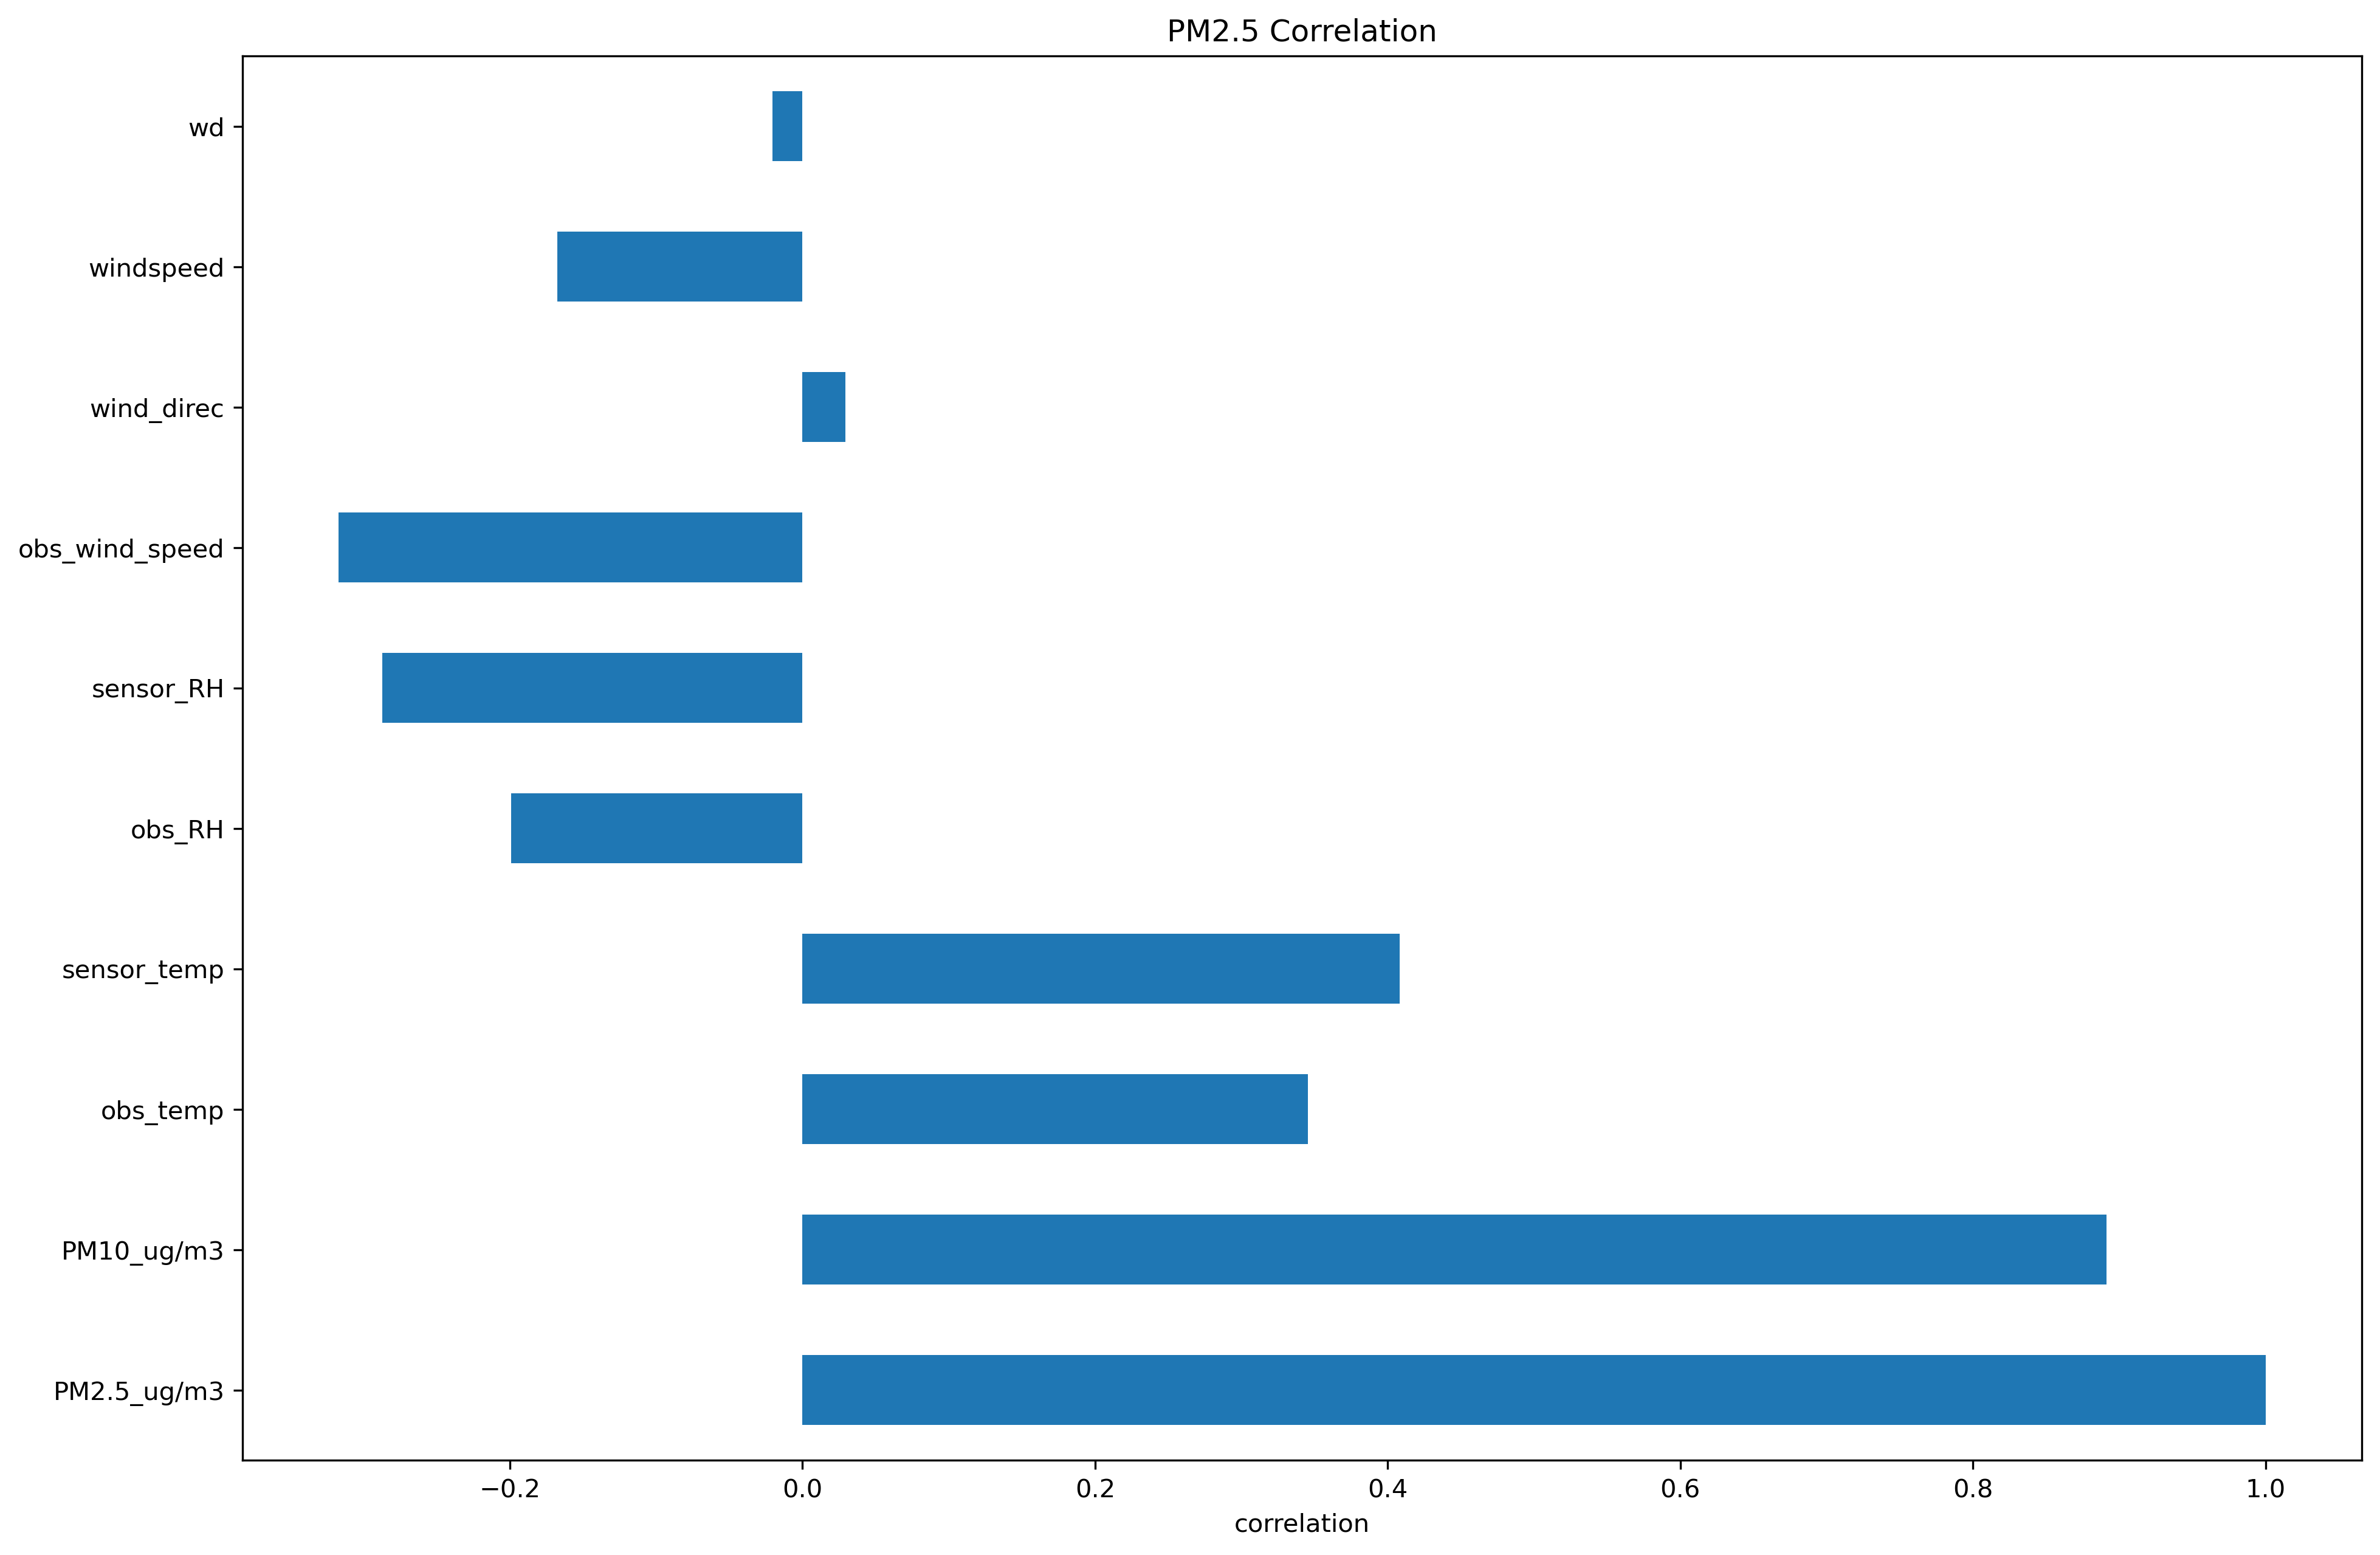

In [26]:
#===================================================================================================
#=============  WORKING ON PLOTTING ================================================================
#===================================================================================================

#================ CORRELATION PLOTTING =======================================================

#correlation barh plots for each pollutant

plt.figure(figsize=(15,10))
cor_with_pm25.plot.barh()
plt.title('PM2.5 Correlation')
plt.xlabel('correlation')
plt.savefig(image_path+'correlation_barh_pm25.png')
plt.show()

In [28]:
cor_with_pm25.drop(columns=['PM2.5_ug/m3'],inplace=True)
cor_with_pm25

PM2.5_ug/m3       1.000000
PM10_ug/m3        0.891165
obs_temp          0.345378
sensor_temp       0.408163
obs_RH           -0.199078
sensor_RH        -0.287418
obs_wind_speed   -0.317015
wind_direc        0.029223
windspeed        -0.167563
wd               -0.020520
Name: PM2.5_ug/m3, dtype: float64

In [31]:
cor_with_pm25 = aq_data.corr(method="spearman")
mask = np.triu(np.ones_like(cor_with_pm25, dtype=bool))

C:\Users\CLi\AppData\Local\Temp\ipykernel_15012\1285776717.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  cor_with_pm25 = aq_data.corr(method="spearman")


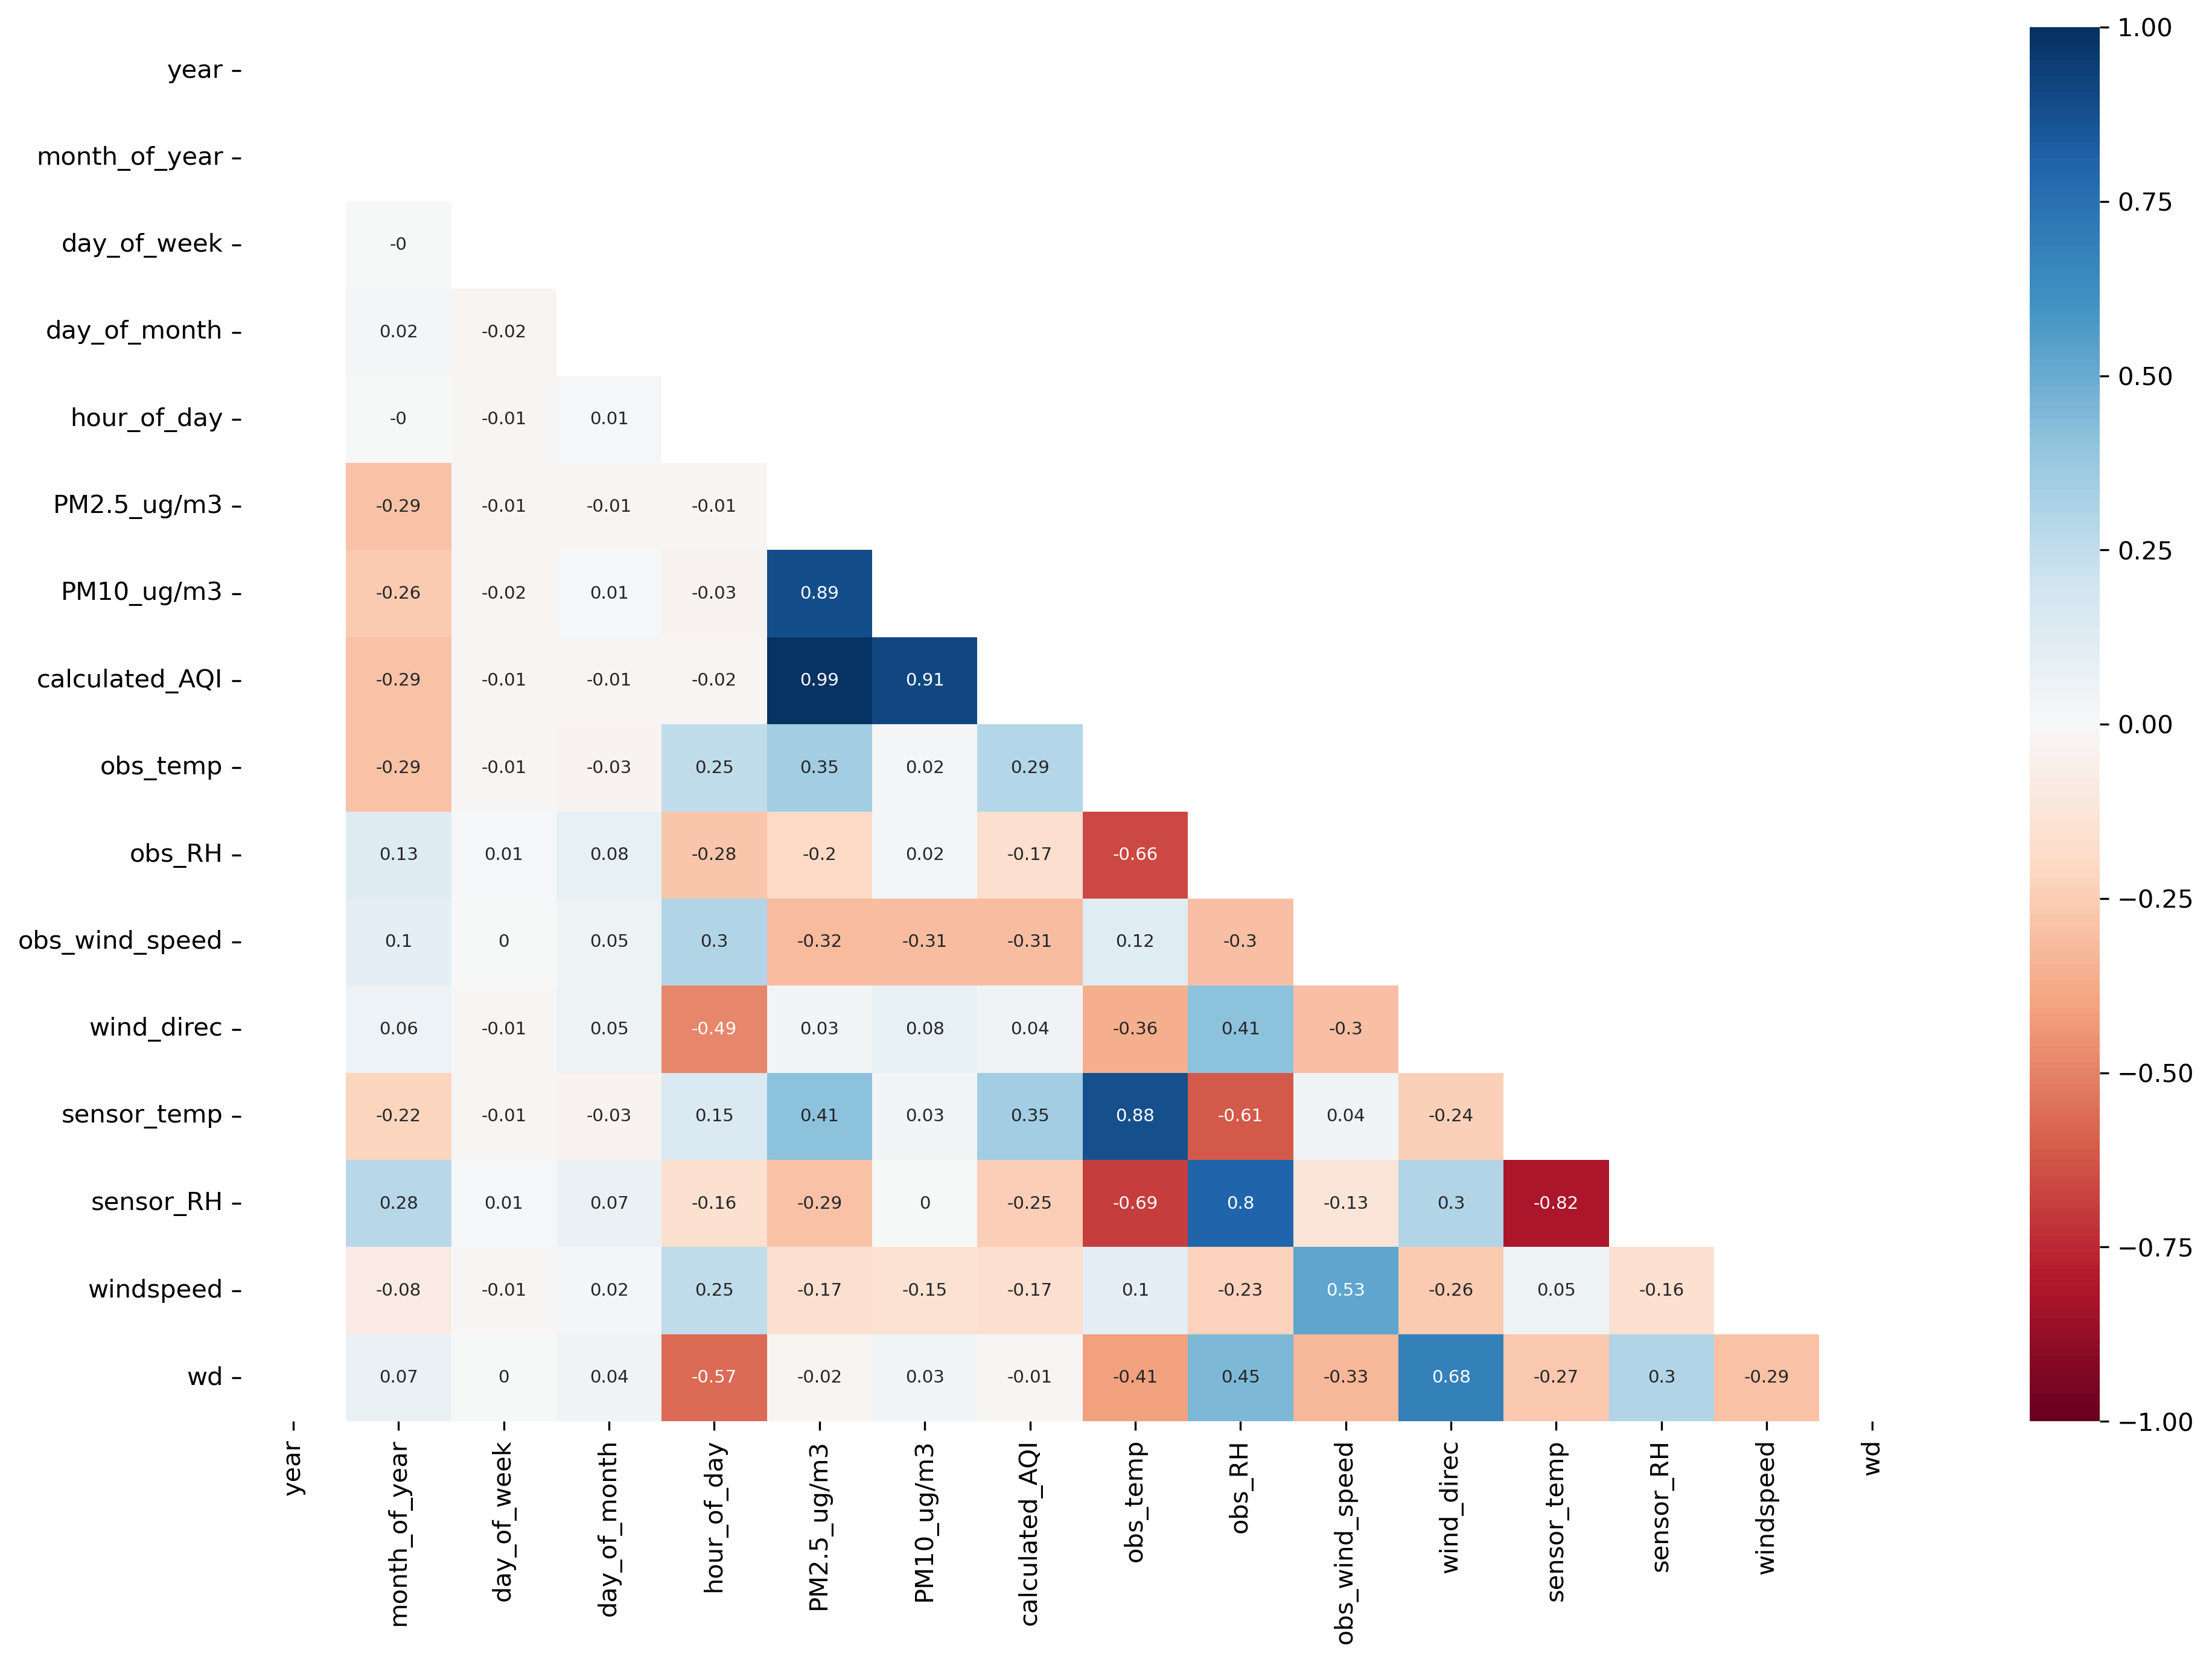

In [32]:
plt.figure(figsize=(15,10))
sns.heatmap(round(cor_with_pm25,2),mask=mask, cmap='RdBu', annot=True, annot_kws={"size": 7}, vmin=-1, vmax=1);
plt.savefig(image_path+'correlation_heatmap1.png')
plt.show()

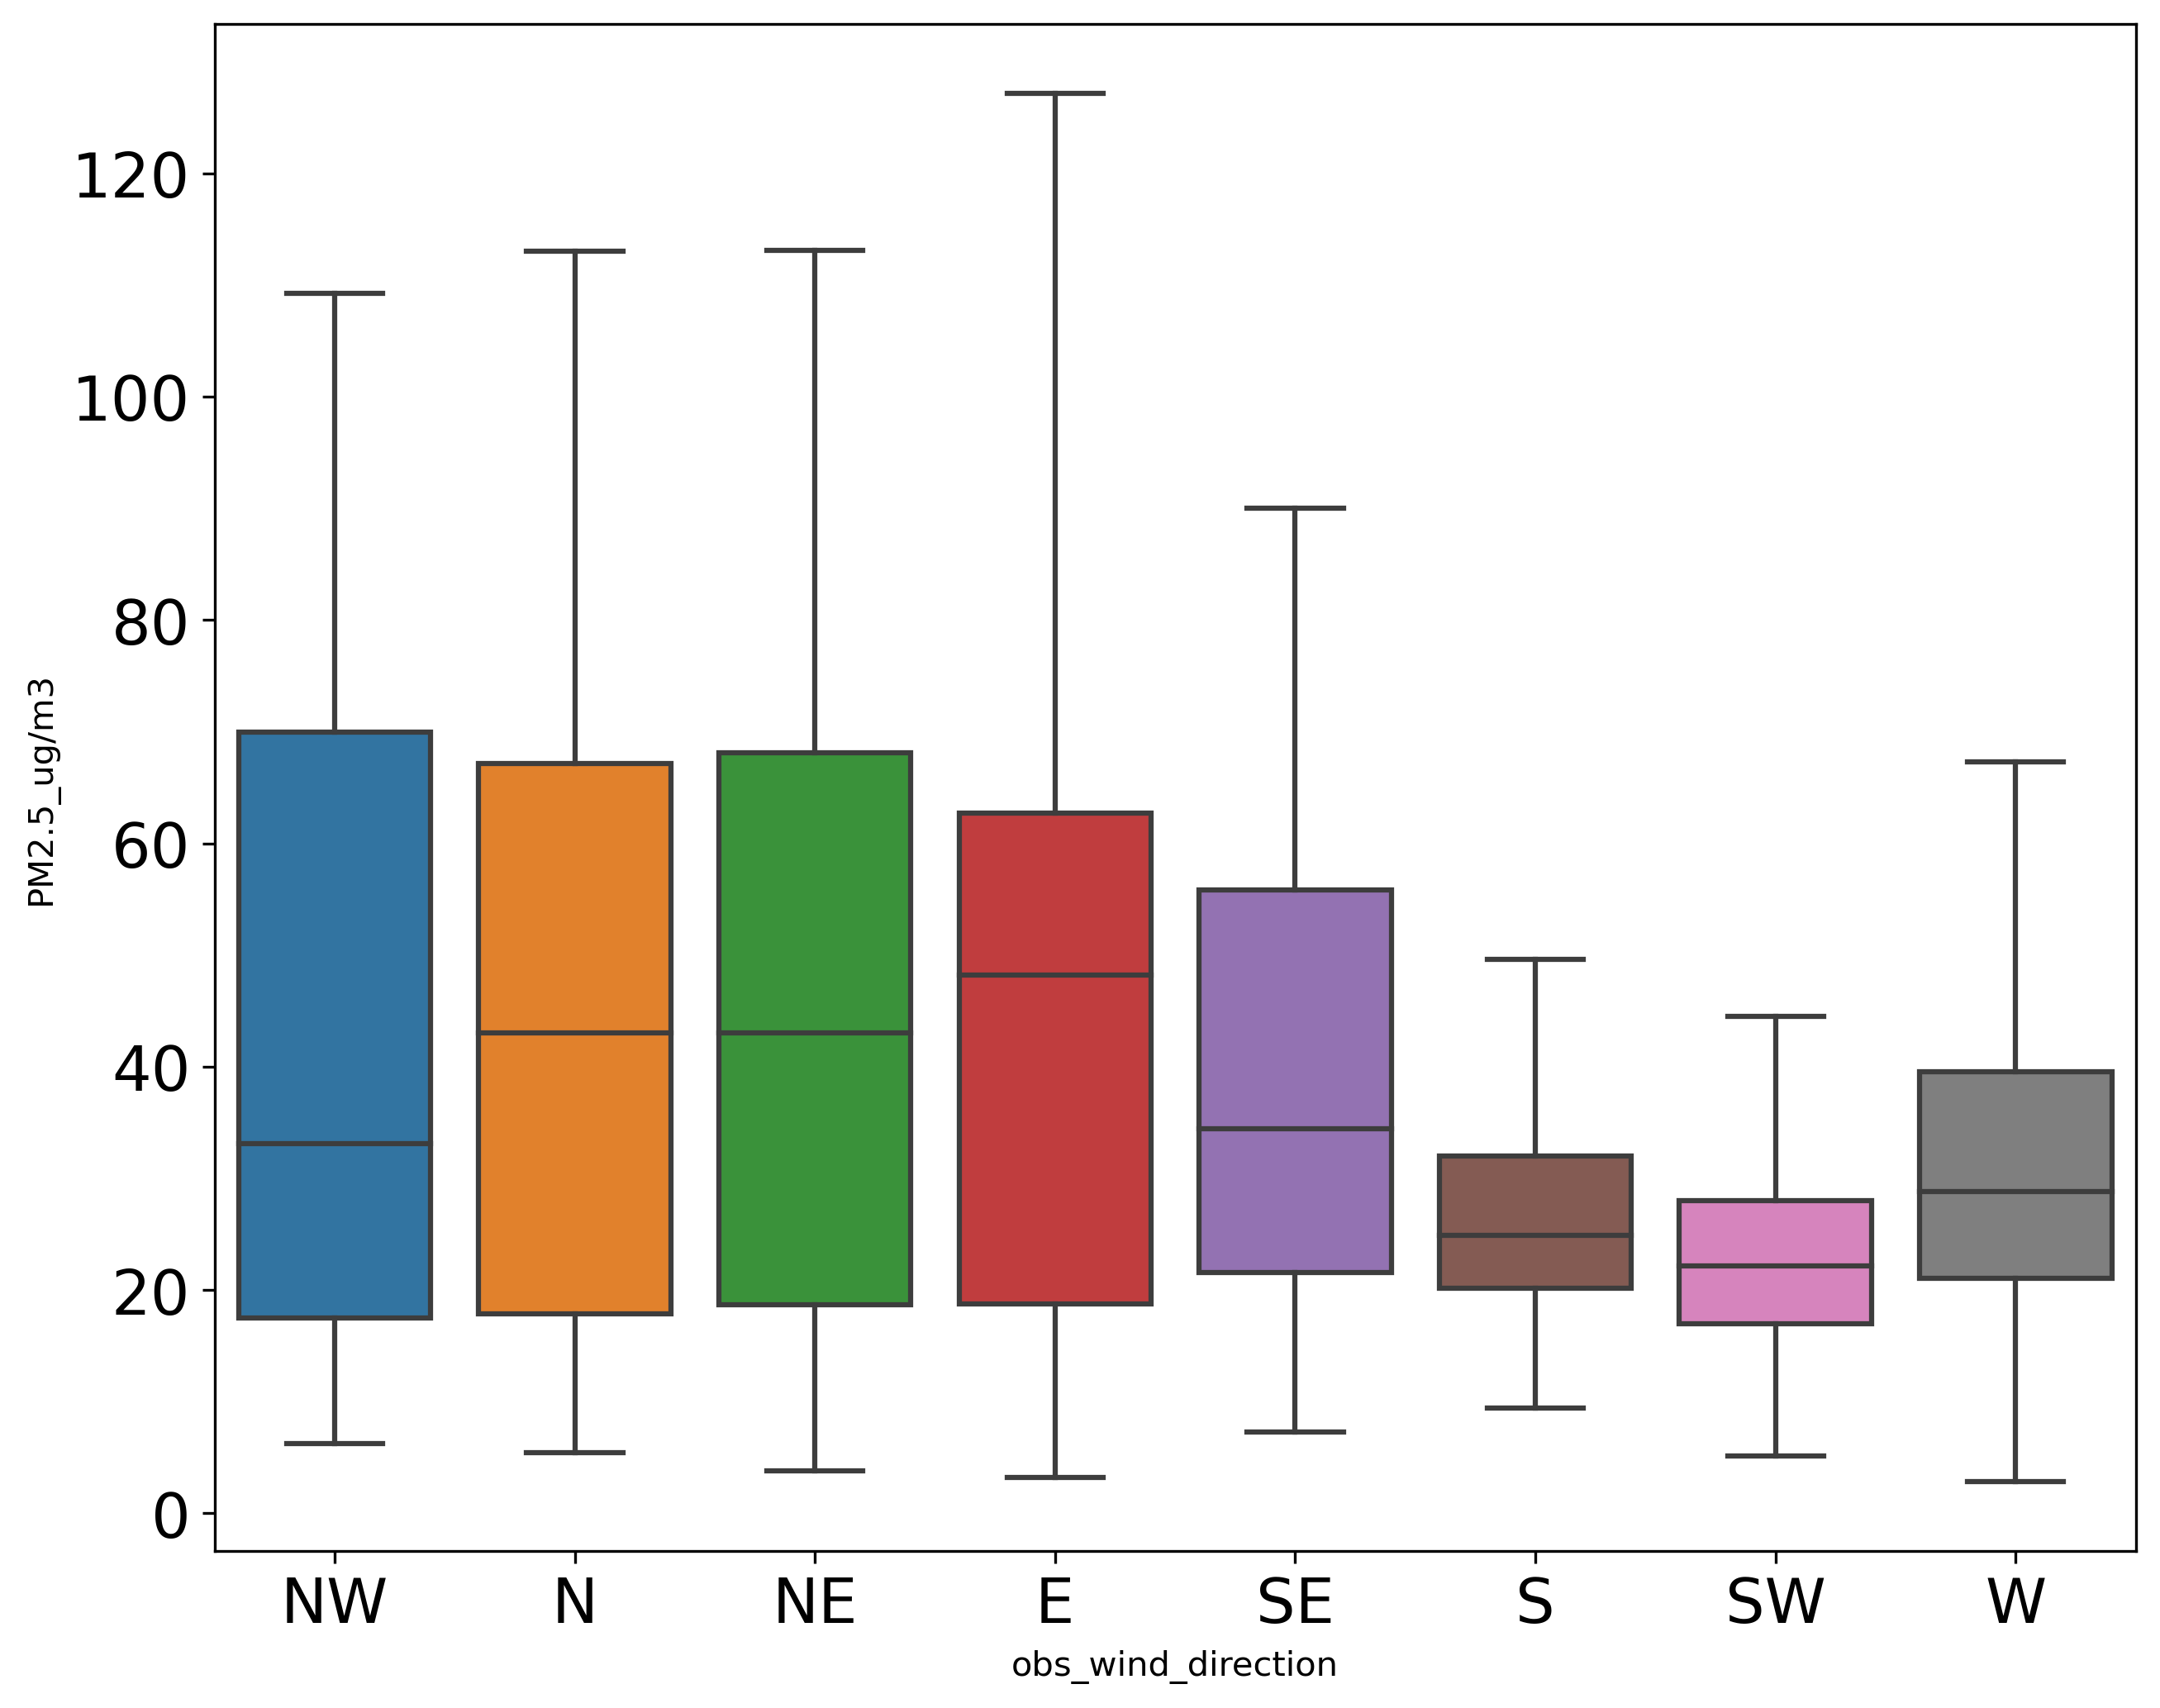

In [84]:
plt.figure(figsize=(10,8))
sns.boxplot(x='obs_wind_direction',y='PM2.5_ug/m3',data=aq_data,
            order=['NW','N','NE','E','SE','S','SW','W'],showfliers=False)
plt.xticks(fontsize=(18))
plt.yticks(fontsize=(18))
plt.savefig(image_path+'obs_wind_spd_direct_box.png')
plt.show()

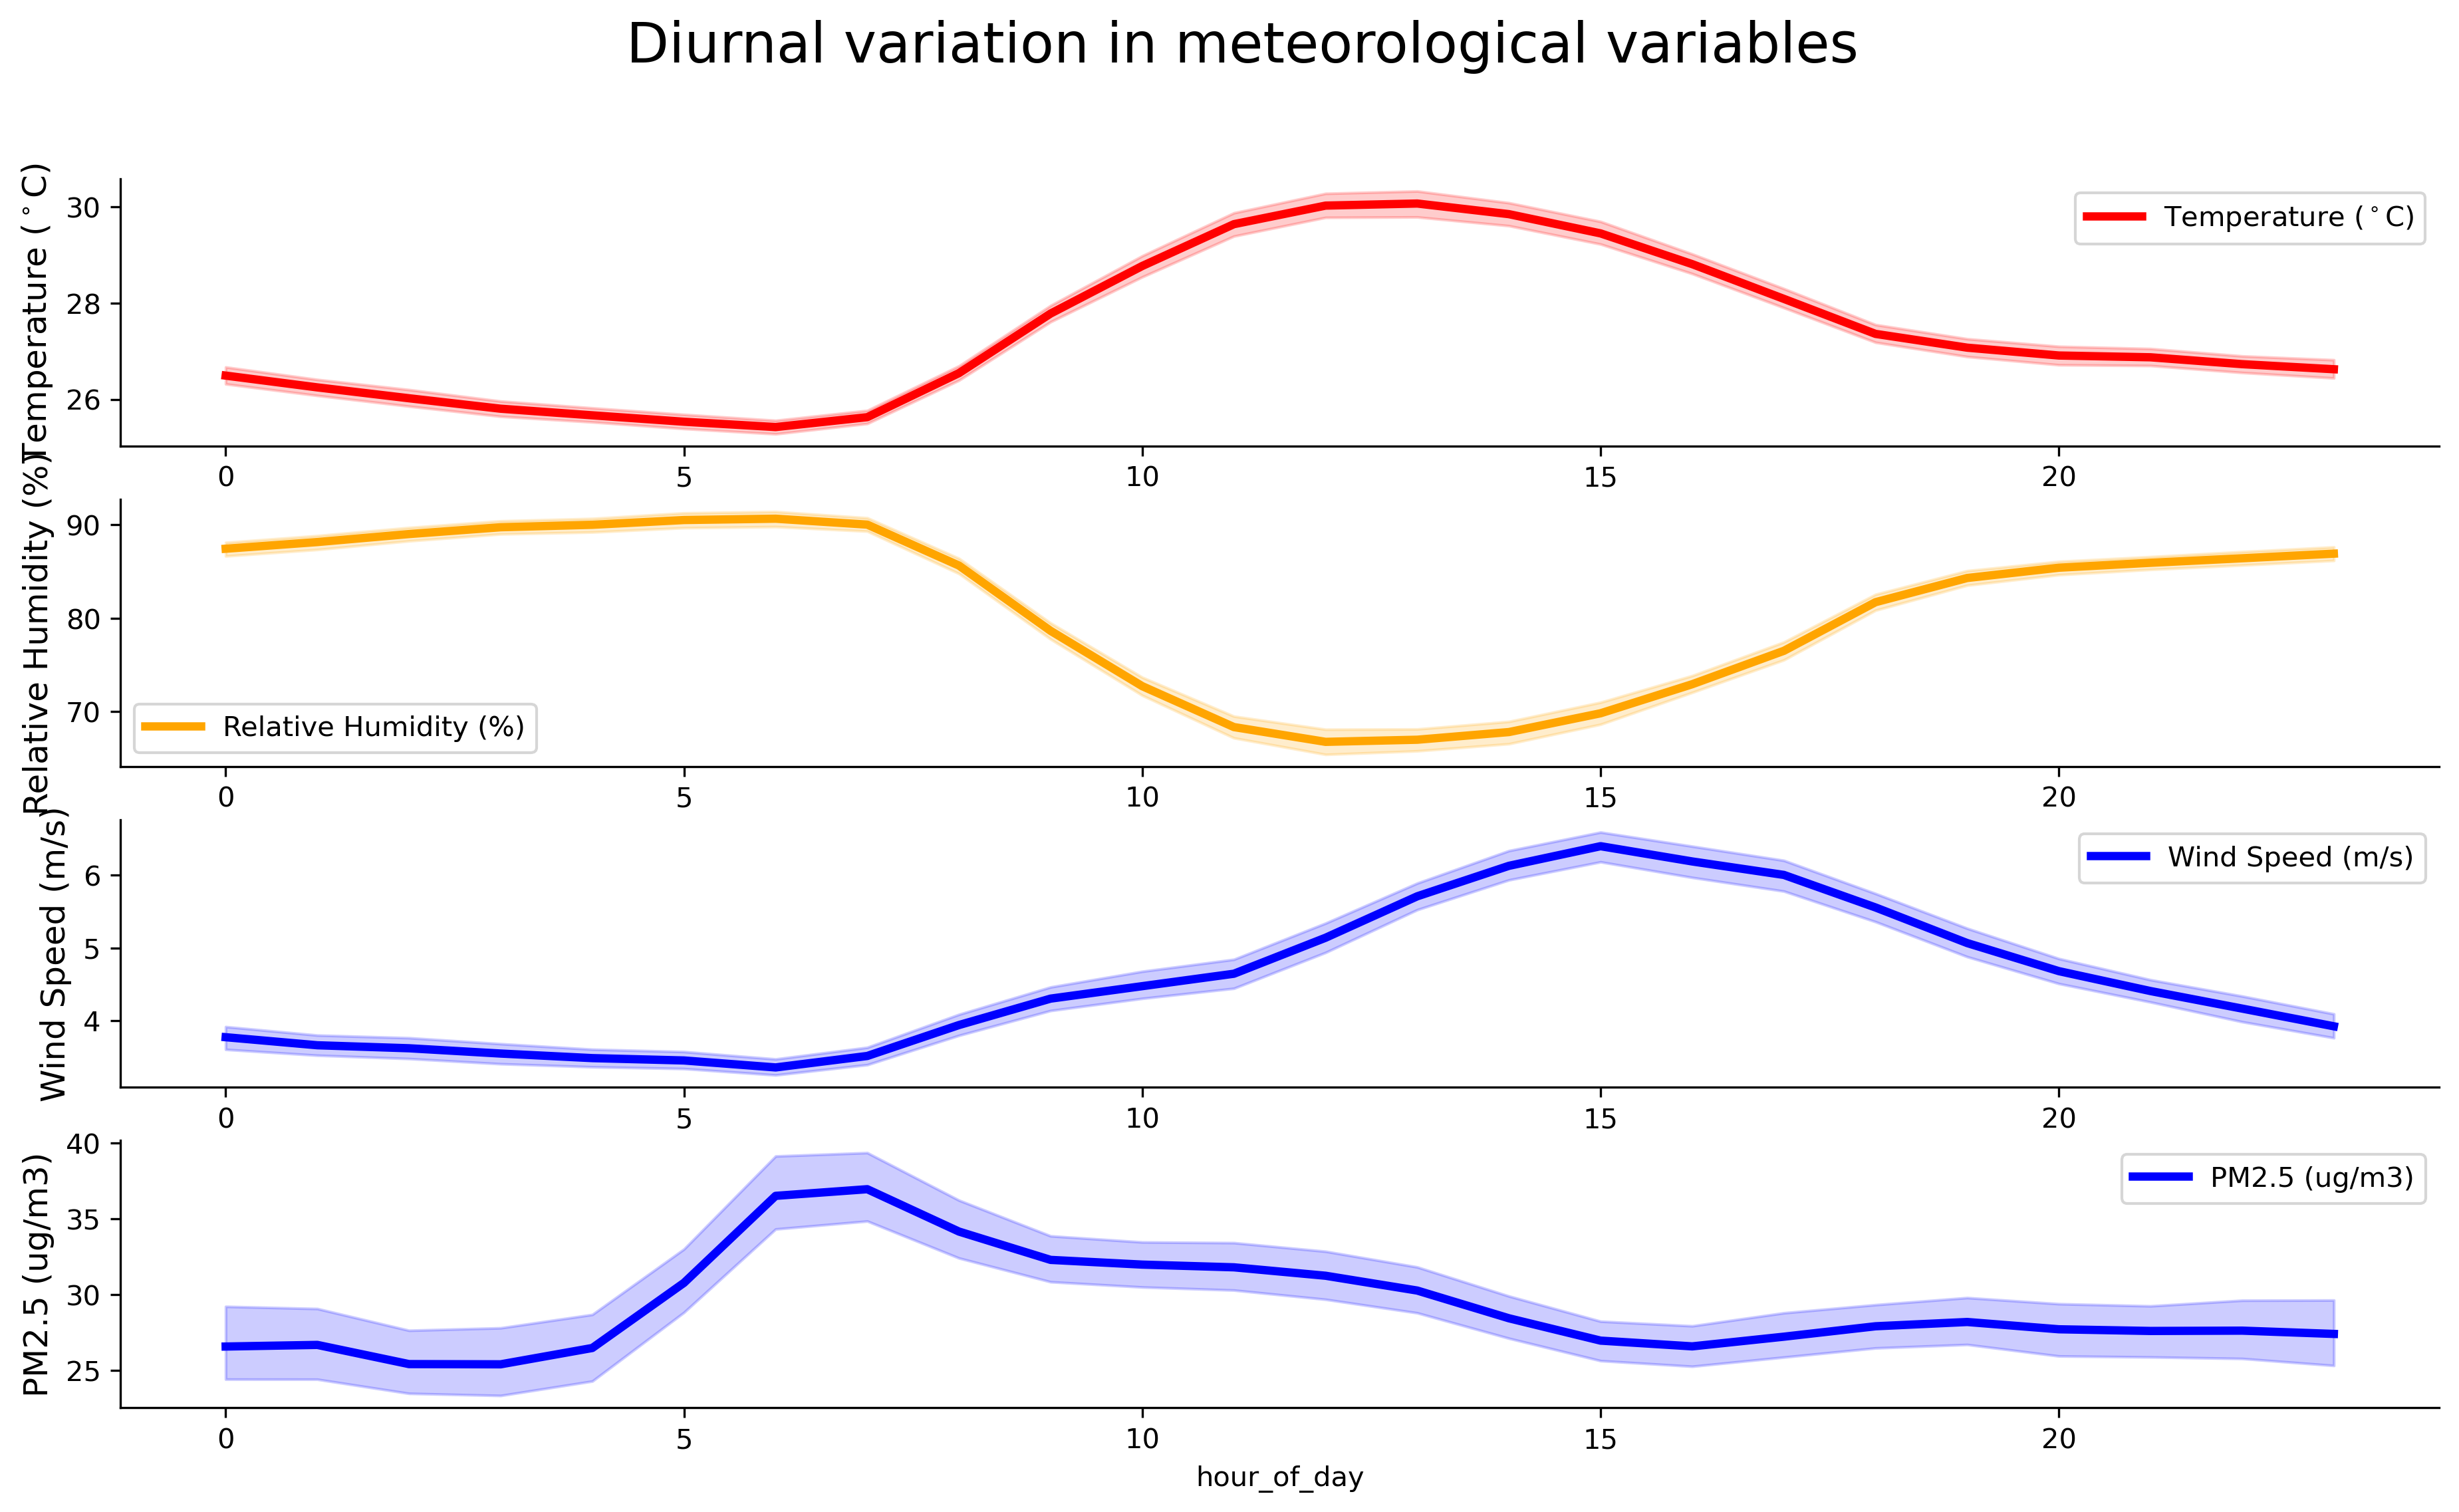

In [41]:
#================ TIME SERIES PLOTTING OF DATA =====================================
##=========hourly==========================================================
# series plotting of diurnal variation in meteorological parameters
fig, axs = plt.subplots(4, 1, figsize=(15, 8), sharex=False)
sns.lineplot(
    x="hour_of_day",
    y="obs_temp",
    linewidth=3,
    data=aq_data,
    label="Temperature ($^\circ$C)",
    color="red",
    ax=axs[0],
)
sns.lineplot(
    x="hour_of_day",
    y="obs_RH",
    linewidth=3,
    data=aq_data,
    label="Relative Humidity (%)",
    color="orange",
    ax=axs[1],
)
sns.lineplot(
    x="hour_of_day",
    y="obs_wind_speed",
    linewidth=3,
    data=aq_data,
    label="Wind Speed (m/s)",
    color="blue",
    ax=axs[2],
)
sns.lineplot(
    x="hour_of_day",
    y="PM2.5_ug/m3",
    linewidth=3,
    data=aq_data,
    label="PM2.5 (ug/m3)",
    color="blue",
    ax=axs[3],
)
fig.suptitle("Diurnal variation in meteorological variables", fontsize=20)
axs[0].set_ylabel("Temperature ($^\circ$C)", fontsize=12)
axs[1].set_ylabel("Relative Humidity (%)", fontsize=12)
axs[2].set_ylabel("Wind Speed (m/s)", fontsize=12)
axs[3].set_ylabel("PM2.5 (ug/m3)",fontsize=12)
sns.despine()
#plt.savefig(image_path+'diurnal_met_timeseries.png')
plt.show()


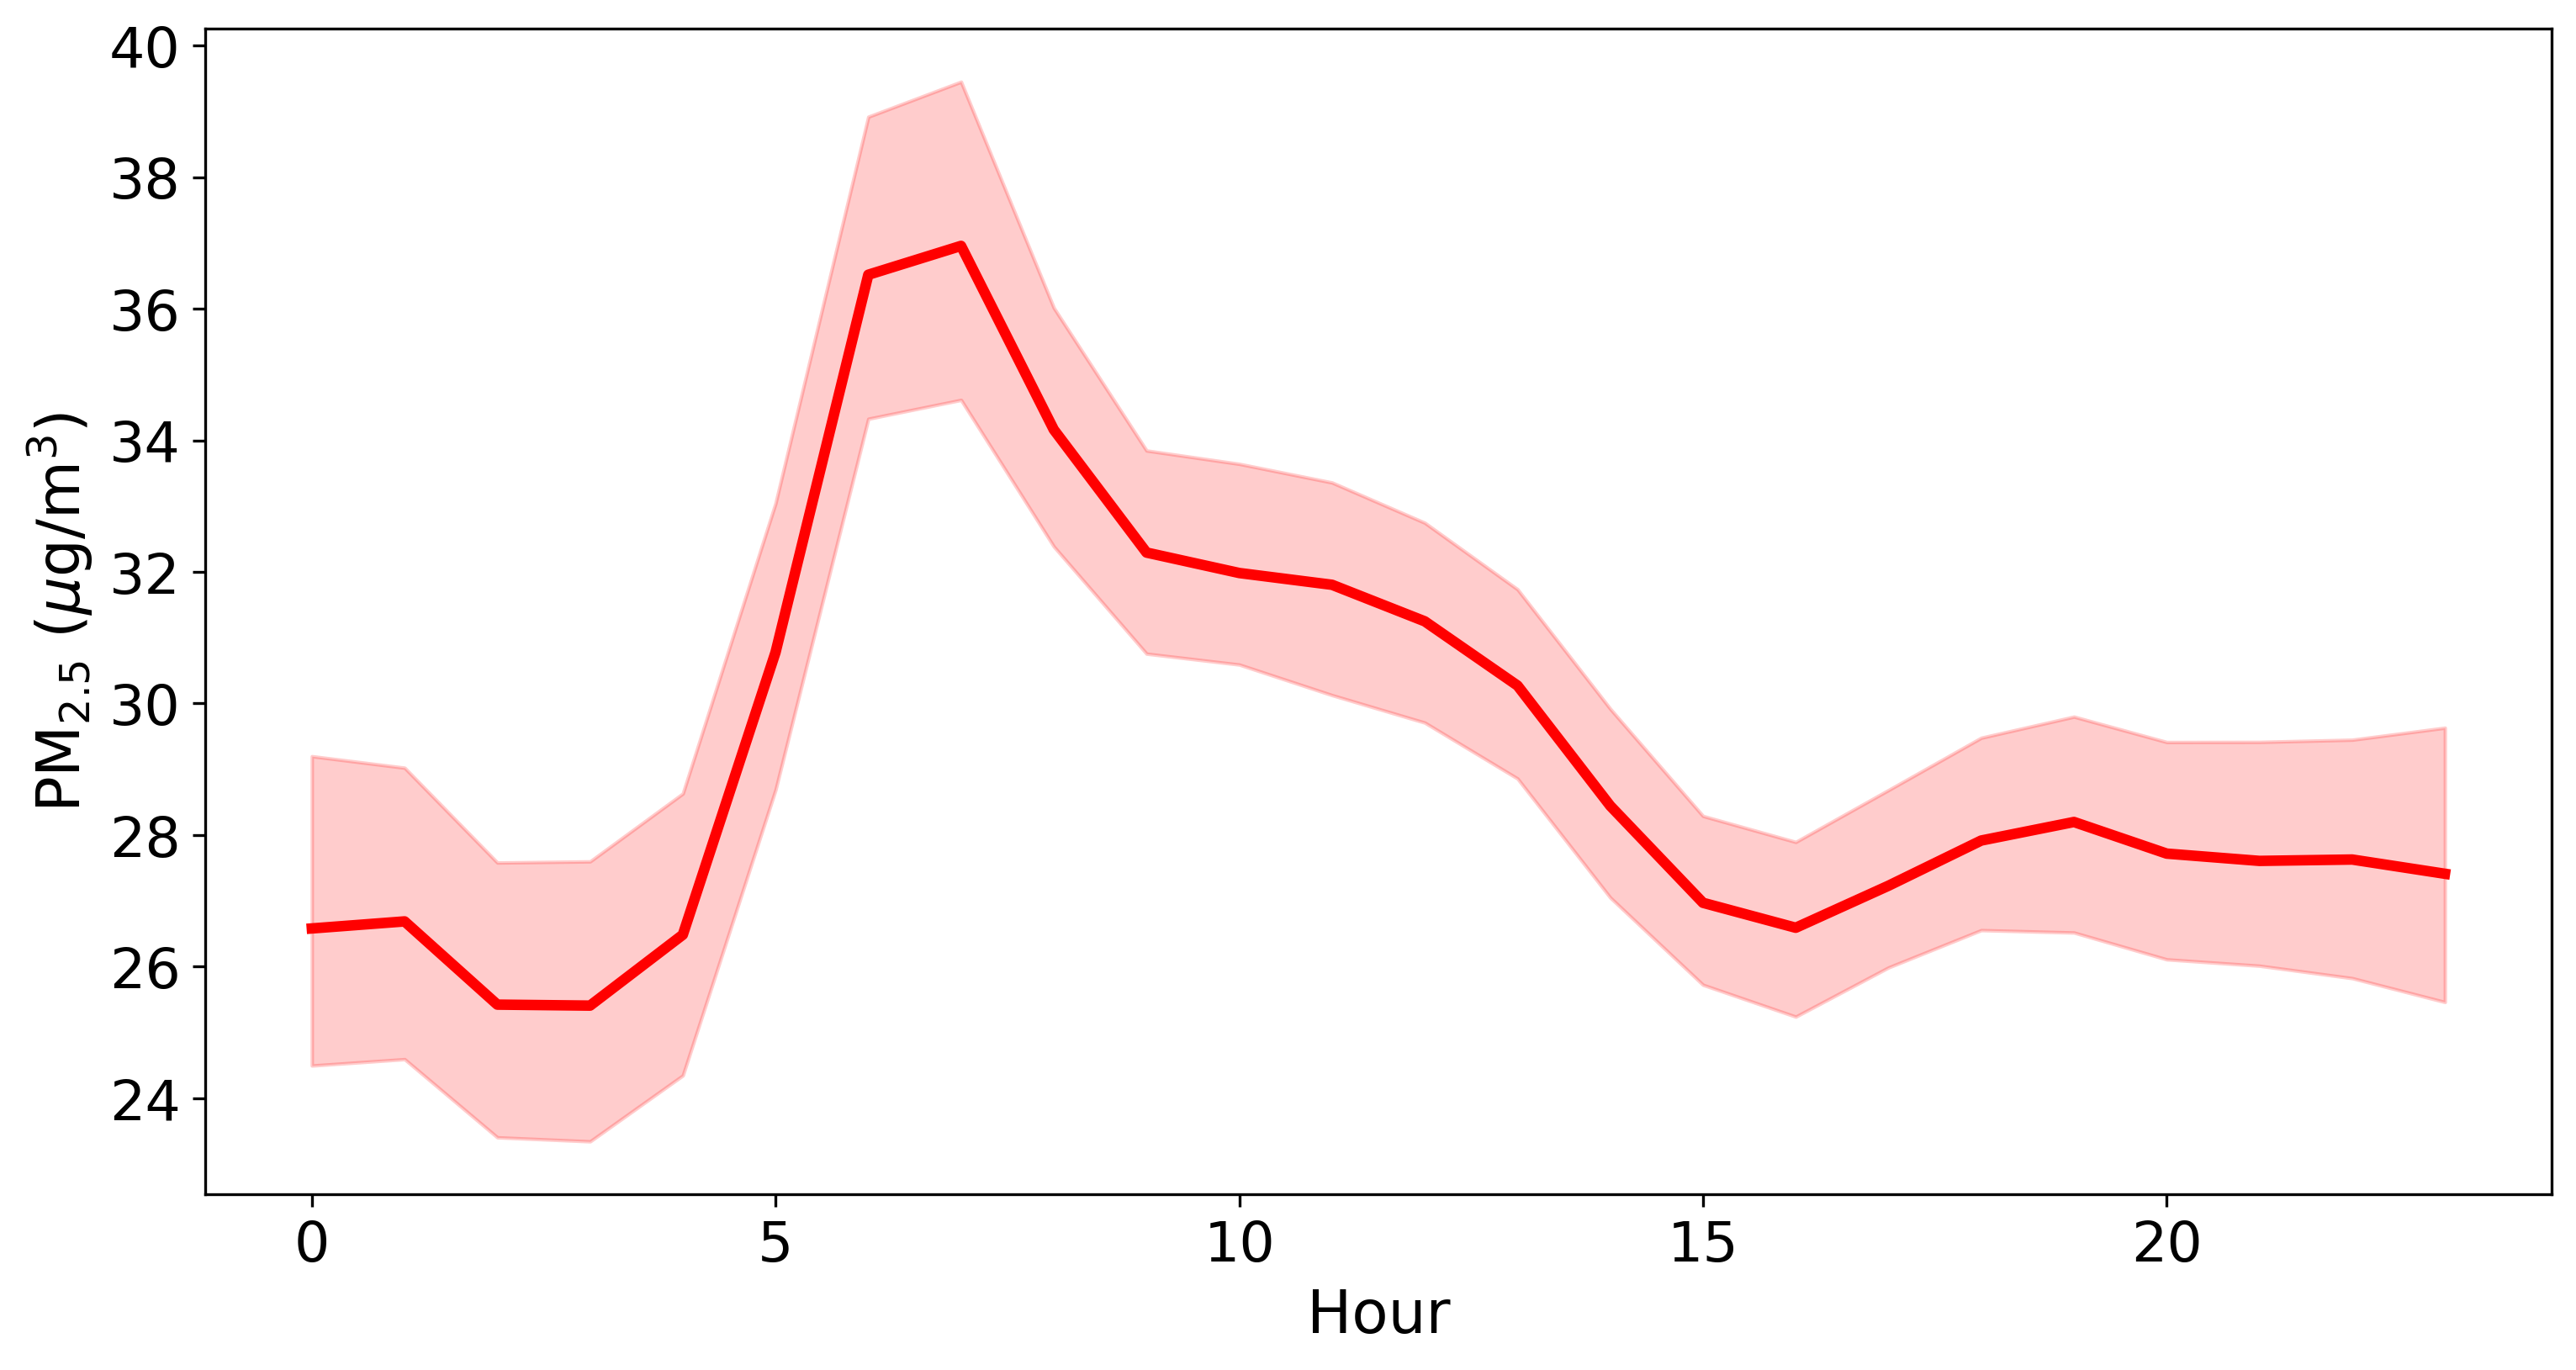

In [43]:
plt.figure(figsize=(12,6))
sns.lineplot(x="hour_of_day",y="PM2.5_ug/m3",linewidth=3,data=aq_data,color="red")
plt.ylabel('PM$_{2.5}$ ($\mu$g/m$^3$)',fontsize=17)
plt.xlabel('Hour',fontsize=17)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.savefig(image_path+'diurnal_pm25_timeseries.png')

In [44]:
#======== PLOTTING OF HEALTH CONCERNS =====================================
colors = ['green','yellow','orange','red','purple','maroon']
orders = ['Good', 'Moderate', 'Unhealthy for Sensitive Groups', 'Unhealthy', 'Very Unhealthy', 'Hazardous']
color_dict = dict(zip(orders,colors))

(array([-50.,   0.,  50., 100., 150., 200., 250., 300., 350.]),
 [Text(0, -50.0, '−50'),
  Text(0, 0.0, '0'),
  Text(0, 50.0, '50'),
  Text(0, 100.0, '100'),
  Text(0, 150.0, '150'),
  Text(0, 200.0, '200'),
  Text(0, 250.0, '250'),
  Text(0, 300.0, '300'),
  Text(0, 350.0, '350')])

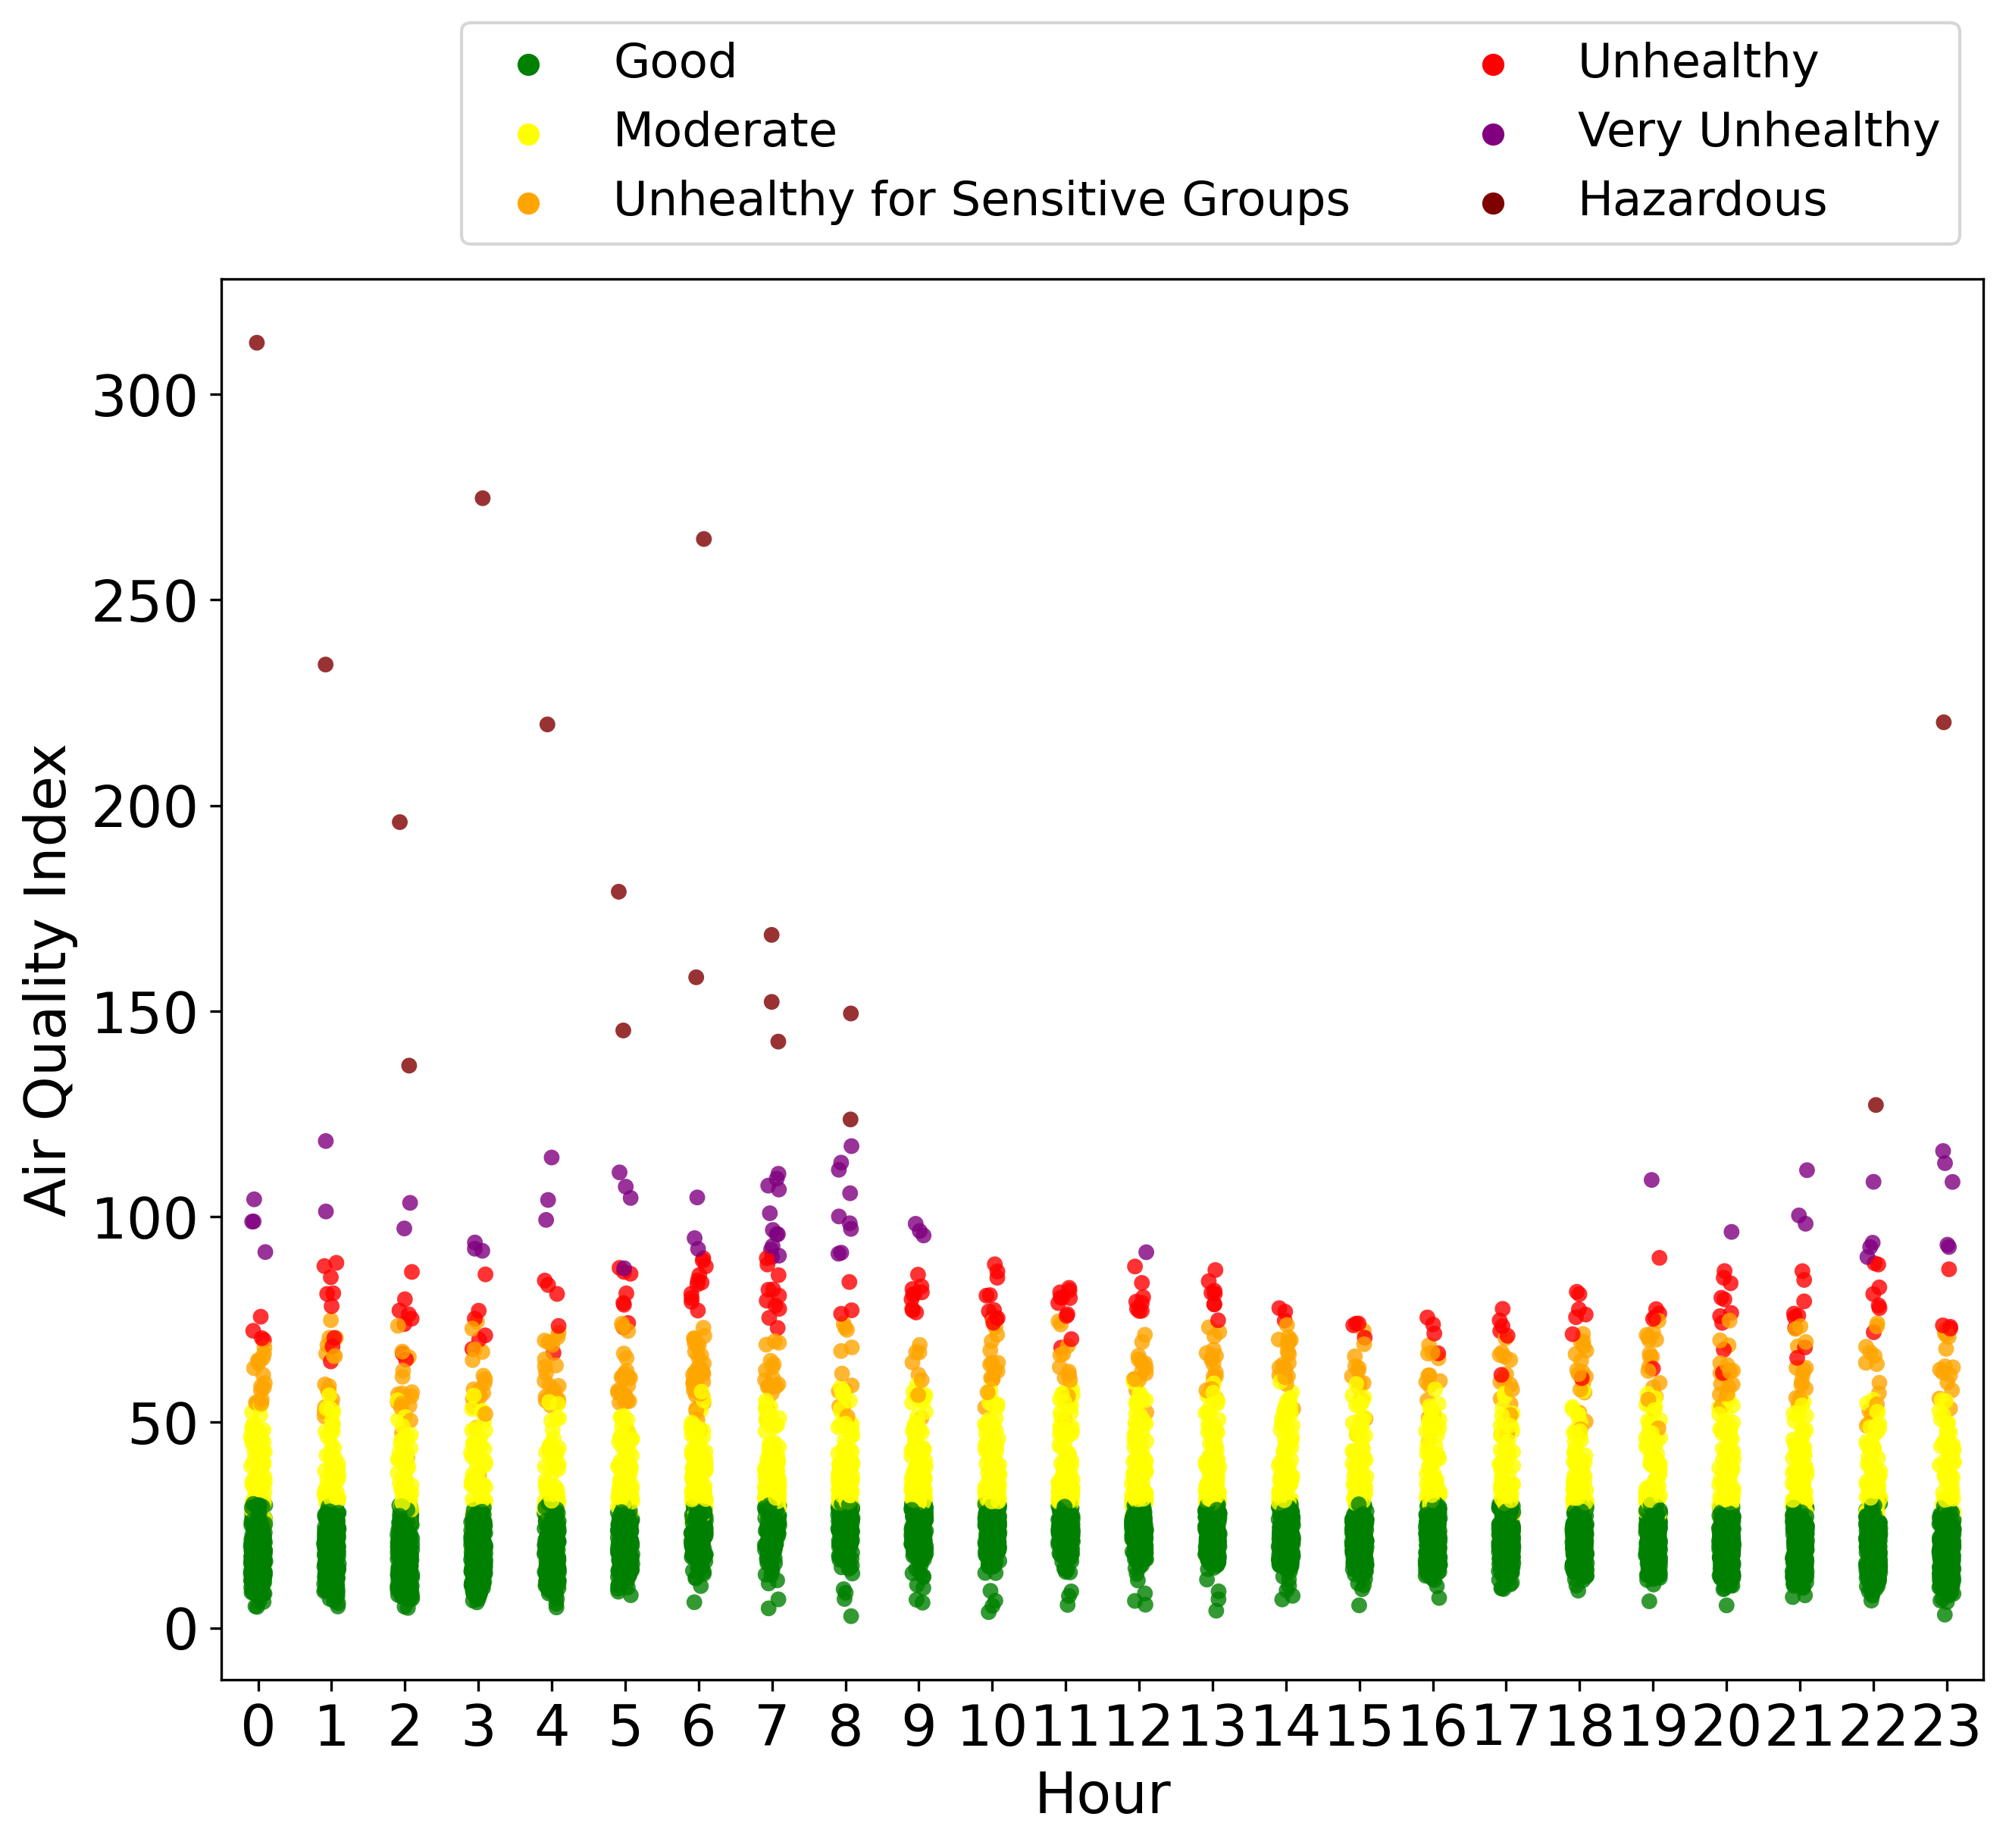

In [46]:
plt.figure(figsize=(10,8))
sns.stripplot(data=aq_data, x="hour_of_day", y="PM2.5_ug/m3",hue='AQI_category',
                hue_order=['Good', 'Moderate', 'Unhealthy for Sensitive Groups', 'Unhealthy', 'Very Unhealthy', 'Hazardous'],
                palette=color_dict, alpha=0.8)
plt.legend(ncol=2,bbox_to_anchor=(1.0,1.2),fontsize=15)
plt.ylabel('Air Quality Index',fontsize=(18))
plt.xlabel('Hour',fontsize=(18))
plt.xticks(fontsize=(18))
plt.yticks(fontsize=(18))

In [95]:
#===================== WINDROSE PLOTTING OF WIND AND POLLUTION =======================
#aq_data_wind = aq_data[['season','wind_direc','obs_wind_speed',
#                         'PM2_5_BAM','PM2_5','PM10']]
winter_aq = aq_data[aq_data['season']=='winter']
spring_aq = aq_data[aq_data['season']=='spring']
summer_aq = aq_data[aq_data['season']=='summer']
fall_aq = aq_data[aq_data['season']=='fall']

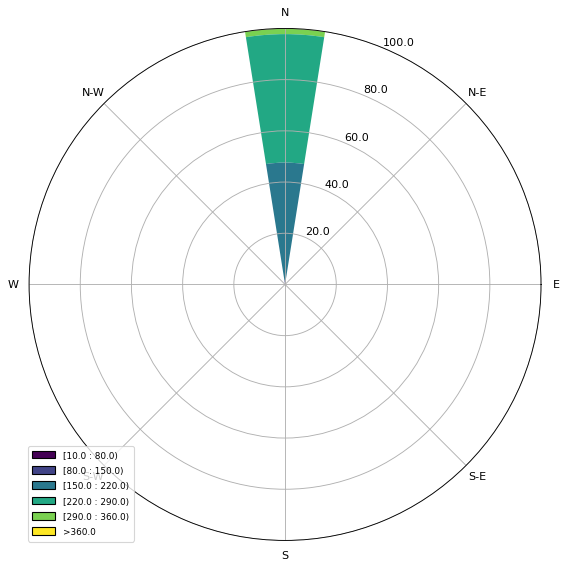

In [97]:
ax = WindroseAxes.from_ax()
ax.bar(fall_aq['obs_wind_speed'], fall_aq['wind_direc'], normed=True)
ax.set_legend()
plt.savefig(image_path+'WindRose_hr.png')
plt.show()

UFuncTypeError: ufunc 'multiply' did not contain a loop with signature matching types (dtype('<U1'), dtype('float64')) -> None

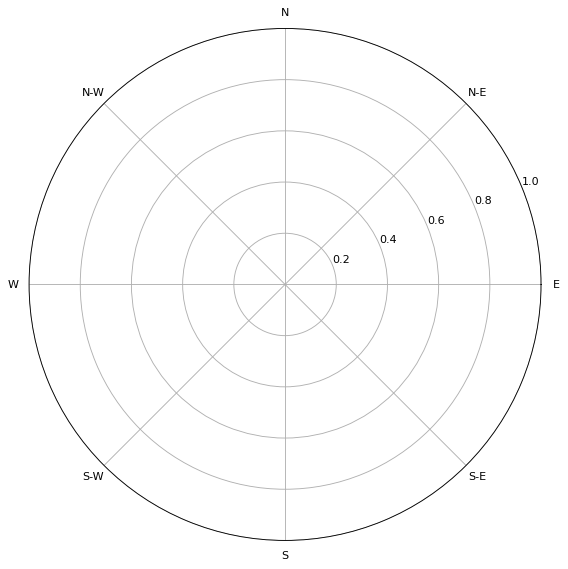

In [90]:
#wind speed and direction
#wind speed and direction
ax = WindroseAxes.from_ax()
ax.bar(winter_wind['wind_direction'], winter_wind['wind_speed'], normed=True, opening=0.8, edgecolor='white')
ax.set_legend()
plt.savefig(image_path+'WindRose_winter_day.png')
plt.show()

In [91]:
aq_data.obs_wind_direction

date_time
2020-01-01 00:00:00    NW
2020-01-01 01:00:00    NW
2020-01-01 02:00:00    NW
2020-01-01 03:00:00     W
2020-01-01 04:00:00     W
                       ..
2020-12-30 19:00:00     S
2020-12-30 20:00:00     S
2020-12-30 21:00:00     S
2020-12-30 22:00:00    SW
2020-12-30 23:00:00    SW
Name: obs_wind_direction, Length: 8127, dtype: object

In [55]:
import calmap
import calplot

In [49]:
all_days = pd.date_range('1/15/2014', periods=700, freq='D')
days = np.random.choice(all_days, 500)
events = pd.Series(np.random.randn(len(days)), index=days)

In [52]:
all_days

DatetimeIndex(['2014-01-15', '2014-01-16', '2014-01-17', '2014-01-18',
               '2014-01-19', '2014-01-20', '2014-01-21', '2014-01-22',
               '2014-01-23', '2014-01-24',
               ...
               '2015-12-06', '2015-12-07', '2015-12-08', '2015-12-09',
               '2015-12-10', '2015-12-11', '2015-12-12', '2015-12-13',
               '2015-12-14', '2015-12-15'],
              dtype='datetime64[ns]', length=700, freq='D')

In [51]:
aq_data['PM2.5_ug/m3']

date_time
2020-01-01 00:00:00     75.6655
2020-01-01 01:00:00     88.7644
2020-01-01 02:00:00    195.9496
2020-01-01 03:00:00    274.7239
2020-01-01 04:00:00    219.7108
                         ...   
2020-12-30 19:00:00     47.4460
2020-12-30 20:00:00     47.3881
2020-12-30 21:00:00     54.1246
2020-12-30 22:00:00     48.6082
2020-12-30 23:00:00     43.9702
Name: PM2.5_ug/m3, Length: 8127, dtype: float64

<Axes: >

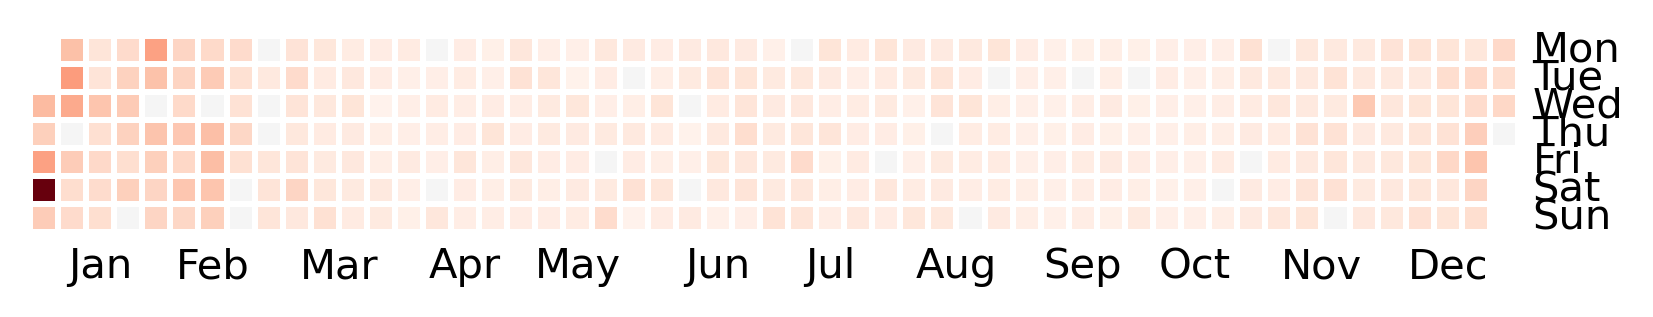

In [65]:
calmap.yearplot(aq_data['PM2.5_ug/m3'], year=2020,vmin=0,vmax=300)

findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.


(<Figure size 3750x510 with 2 Axes>,
 array([<Axes: ylabel='2020'>], dtype=object))

findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.


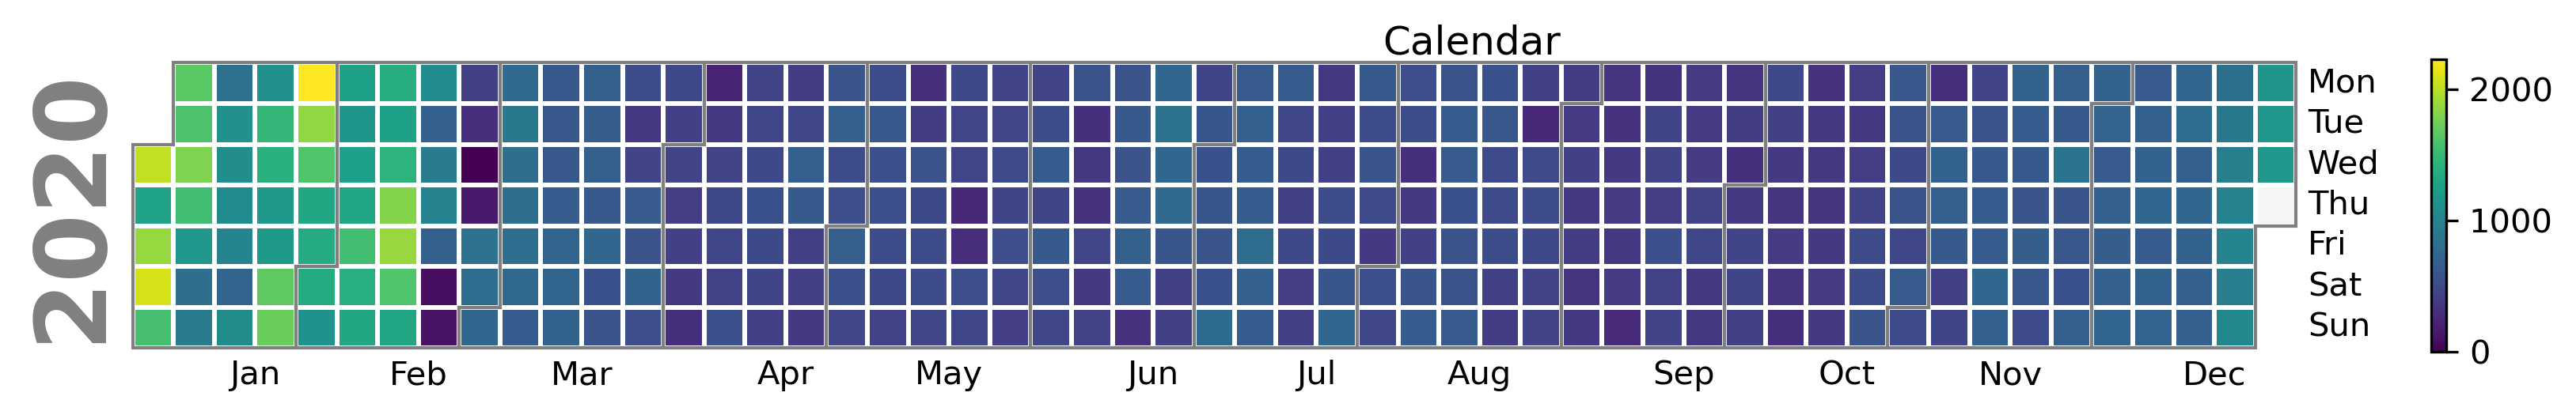

In [56]:
calplot.calplot(aq_data['PM2.5_ug/m3'],
                suptitle = 'Calendar',
                suptitle_kws = {'x': 0.5, 'y': 1.0})

findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.


(<Figure size 3750x510 with 2 Axes>,
 array([<Axes: ylabel='2020'>], dtype=object))

findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.


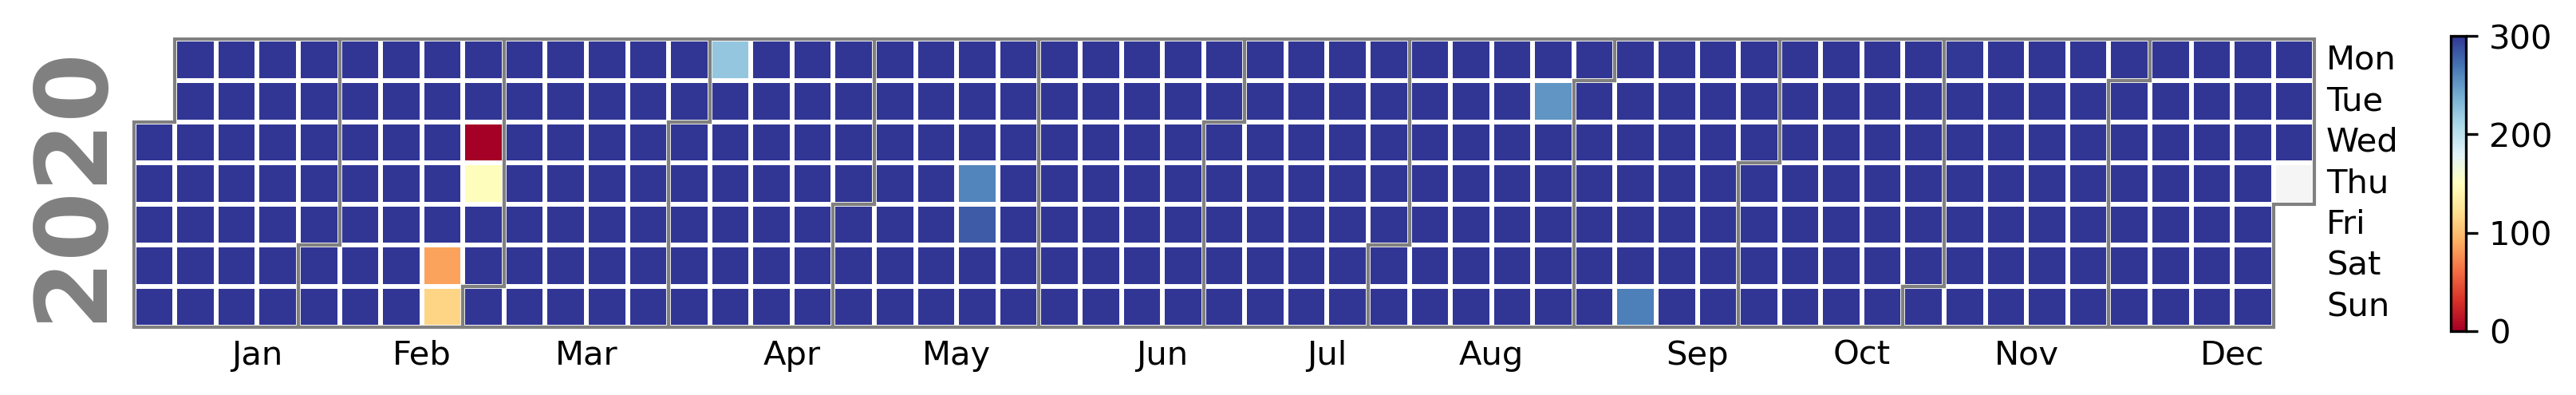

In [62]:
calplot.calplot(aq_data['PM2.5_ug/m3'], cmap='RdYlBu',vmin=0, vmax=300,)

In [70]:
aq_data_series = pd.Series(aq_data['PM2.5_ug/m3'])

In [66]:
events

2015-11-17    1.106000
2014-06-30   -0.559403
2014-11-10    0.328557
2014-01-28   -1.618723
2014-05-04   -0.487407
                ...   
2014-11-27    0.134376
2014-12-06    0.290761
2014-10-20   -0.863049
2014-05-06   -0.250320
2015-06-25    2.121885
Length: 500, dtype: float64

findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.


(<Figure size 3750x510 with 2 Axes>,
 array([<Axes: ylabel='2020'>], dtype=object))

findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.


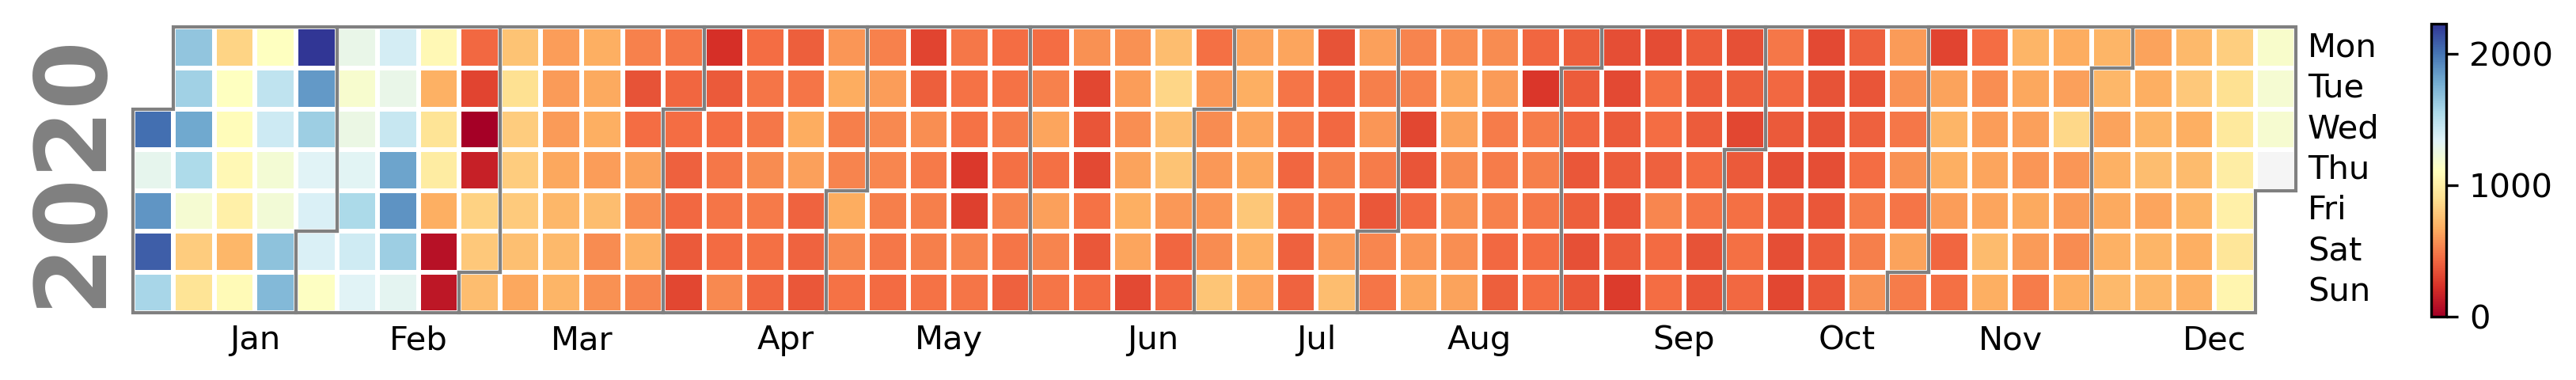

In [71]:
calplot.calplot(aq_data_series, cmap='RdYlBu')

In [74]:
aq_data_series

date_time
2020-01-01 00:00:00     75.6655
2020-01-01 01:00:00     88.7644
2020-01-01 02:00:00    195.9496
2020-01-01 03:00:00    274.7239
2020-01-01 04:00:00    219.7108
                         ...   
2020-12-30 19:00:00     47.4460
2020-12-30 20:00:00     47.3881
2020-12-30 21:00:00     54.1246
2020-12-30 22:00:00     48.6082
2020-12-30 23:00:00     43.9702
Name: PM2.5_ug/m3, Length: 8127, dtype: float64

In [76]:
#resample data by day
aq_day = aq_data.resample('D').mean()
aq_day

C:\Users\CLi\AppData\Local\Temp\ipykernel_15012\922283805.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  aq_day = aq_data.resample('D').mean()


,year,month_of_year,day_of_week,day_of_month,hour_of_day,PM2.5_ug/m3,PM10_ug/m3,calculated_AQI,obs_temp,obs_RH,obs_wind_speed,wind_direc,sensor_temp,sensor_RH,windspeed,wd
date_time,,,,,,,,,,,,,,,,
2020-01-01,2020.0,1.0,2.0,1.0,11.434783,88.172865,180.020000,180.739130,28.521739,61.057826,2.413947,167.391304,32.304348,46.903043,1.535317,191.434783
2020-01-02,2020.0,1.0,3.0,2.0,10.571429,61.627129,119.268333,122.285714,28.000000,46.967143,3.451689,128.571429,31.857143,37.128571,1.541067,211.714286
2020-01-03,2020.0,1.0,4.0,3.0,11.304348,81.742874,175.226630,175.304348,26.478261,42.475652,2.816272,85.652174,30.826087,31.865870,3.620209,220.043478
2020-01-04,2020.0,1.0,5.0,4.0,11.913043,90.553646,217.634239,202.739130,26.565217,37.150435,3.218596,73.913043,30.630435,29.070217,3.016774,219.739130
2020-01-05,2020.0,1.0,6.0,5.0,11.500000,65.568888,173.423646,155.583333,26.958333,43.746667,2.677507,158.750000,30.750000,34.448125,2.321054,223.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-12-26,2020.0,12.0,5.0,26.0,11.347826,40.626752,58.272826,67.782609,28.521739,81.603043,2.793920,234.347826,33.304348,73.556957,2.037326,222.739130
2020-12-27,2020.0,12.0,6.0,27.0,11.500000,43.550900,65.014375,72.708333,28.541667,79.572917,3.255849,228.750000,33.458333,70.189583,1.921954,235.583333
2020-12-28,2020.0,12.0,0.0,28.0,11.500000,48.544813,76.547083,83.083333,28.500000,80.118750,3.555729,237.083333,32.916667,73.958333,1.954304,234.833333


findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.


(<Figure size 3750x510 with 2 Axes>,
 array([<Axes: ylabel='2020'>], dtype=object))

findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.


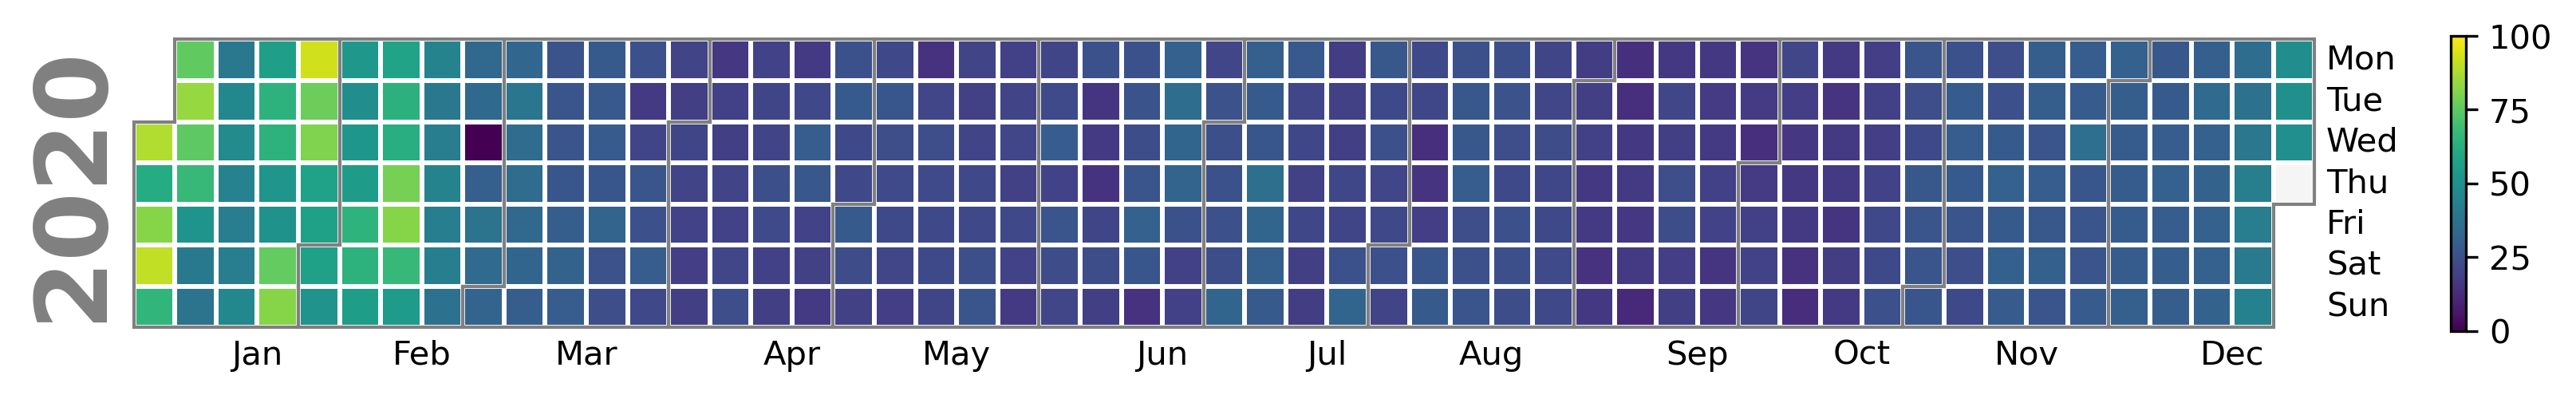

In [80]:
calplot.calplot(aq_day['PM2.5_ug/m3'], cmap='viridis',vmin=0,vmax=100)